# NOTEBOOK TO TRAIN AND SAVE A MODEL

In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import pickle

# splitting
from sklearn.model_selection import train_test_split

# models
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# loading the data

# features to be used (selected from the notebook Pre-Processing)
X = pd.read_csv('features.csv')

# targets to be used (selected from the notebook Pre-Processing)
y_AR = pd.read_csv('targets_AR.csv')
y_YI = pd.read_csv('targets_YI.csv')

In [3]:
# Summing soluble and insoluble ligning (so to get total ligning in raw material)
X['Total lignin (wt.%)'] = X['Insoluble lignin (wt.%)'] + X['Soluble lignin (wt.%)']
X = X[['Cationic demand (µeq/g)','Transmittance at 600 nm (%)','HPH - Energy consumption (kWh/kg)','Consistency index "k"','Flow index "n"','Cellulose (wt.%)','Hemicellulose (wt.%)','Total lignin (wt.%)','Extractives (wt.%)','Ashes (wt.%)','CrI (%)']]
display(X)

,Cationic demand (µeq/g),Transmittance at 600 nm (%),HPH - Energy consumption (kWh/kg),"Consistency index ""k""","Flow index ""n""",Cellulose (wt.%),Hemicellulose (wt.%),Total lignin (wt.%),Extractives (wt.%),Ashes (wt.%),CrI (%)
0,199,0.097,14.59,0.7810,0.299,0.462,0.229,0.294,0.009,0.005,0.761
1,155,0.031,7.73,0.6245,0.272,0.479,0.229,0.270,0.007,0.014,0.733
2,214,0.119,19.72,1.2010,0.278,0.462,0.229,0.294,0.009,0.005,0.761
3,188,0.099,14.59,6.6384,0.224,0.742,0.166,0.082,0.000,0.008,0.811
4,154,0.054,5.67,2.1776,0.253,0.853,0.087,0.039,0.012,0.009,0.870
5,185,0.070,11.67,0.6160,0.307,0.462,0.229,0.294,0.009,0.005,0.761
6,166,0.065,7.73,4.9868,0.280,0.742,0.166,0.082,0.000,0.008,0.811
7,201,0.095,14.59,4.8156,0.234,0.853,0.087,0.039,0.012,0.009,0.870
8,190,0.074,19.72,1.1071,0.239,0.479,0.229,0.270,0.007,0.014,0.733
9,170,0.059,11.67,0.7885,0.270,0.479,0.229,0.270,0.007,0.014,0.733


In [4]:
def training_RandomForestRegressor(X, y, 
                                               test_size=0.2, 
                                               random_state_split=0, 
                                               n_estimators=200,
                                               min_samples_leaf = 1,
                                               max_depth = None,
                                               random_state_model=1,
                                               top_n_features = 6,
                                               print_out = False
                                              ):
    
    """
    This function will split, train, test and output results for the model
    
    X -> DataFrame of the features
    y -> DataFrame of the targets
    """
    global X_train, X_test, y_train, y_test
    # splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(),
                                                        test_size = test_size,
                                                        random_state = random_state_split
                                                       )
    # instanciating the model
    model_RandomForestRegressor = RandomForestRegressor(n_estimators=n_estimators,
                                                        min_samples_leaf=min_samples_leaf,
                                                        random_state = random_state_model
                                                       )
    # training the model
    model_RandomForestRegressor.fit(X_train, y_train)
    
    # predicting the model with train test
    prediction_train = model_RandomForestRegressor.predict(X_train)
    
    # output the results from train set
    MAE = mean_absolute_error(y_train,prediction_train)
    MAPE = mean_absolute_percentage_error(y_train,prediction_train)
    RSME = mean_squared_error(y_train,prediction_train, squared = False)
    R2 = r2_score(y_train,prediction_train)
    

    #Getting features importance from this last model
    feat_importances_model_RF = pd.Series(model_RandomForestRegressor.feature_importances_, index=X.columns)
    
    
    if print_out == True:
        print("MAE train set:", MAE)
        print("MAPE train set::", MAPE)
        print("RSME train set::", RSME)
        print("R2 score train set::", R2)

        fig, ax = plt.subplots()
        ax.scatter(y_train, prediction_train, edgecolors=(0, 0, 0))
        ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
        ax.set_xlabel("Measured")
        ax.set_ylabel("Predicted")
        plt.savefig('Feature_imp_AR.png', dpi=600, bbox_inches = "tight") 
        plt.show()

        feat_importances_model_RF.nlargest(top_n_features).plot(kind='barh');
    
    return [MAE,MAPE,RSME,R2,feat_importances_model_RF, model_RandomForestRegressor]

# Aspect Ratio

MAE train set: 3.8246874999999996
MAPE train set:: 0.03708025122725839
RSME train set:: 5.4769983510587235
R2 score train set:: 0.9893218197796331


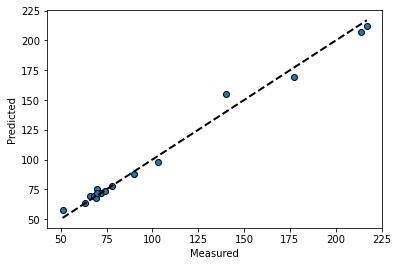

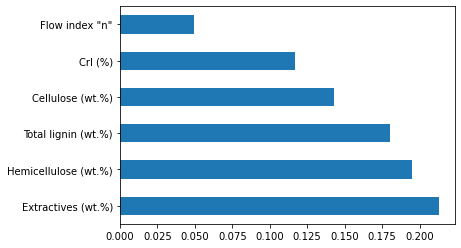

In [5]:
return_list = training_RandomForestRegressor(X, y_AR,
                                               print_out = True
                                              )

MIN_SAMPLES: 1
max: 4.305357142857139
min: 2.21875


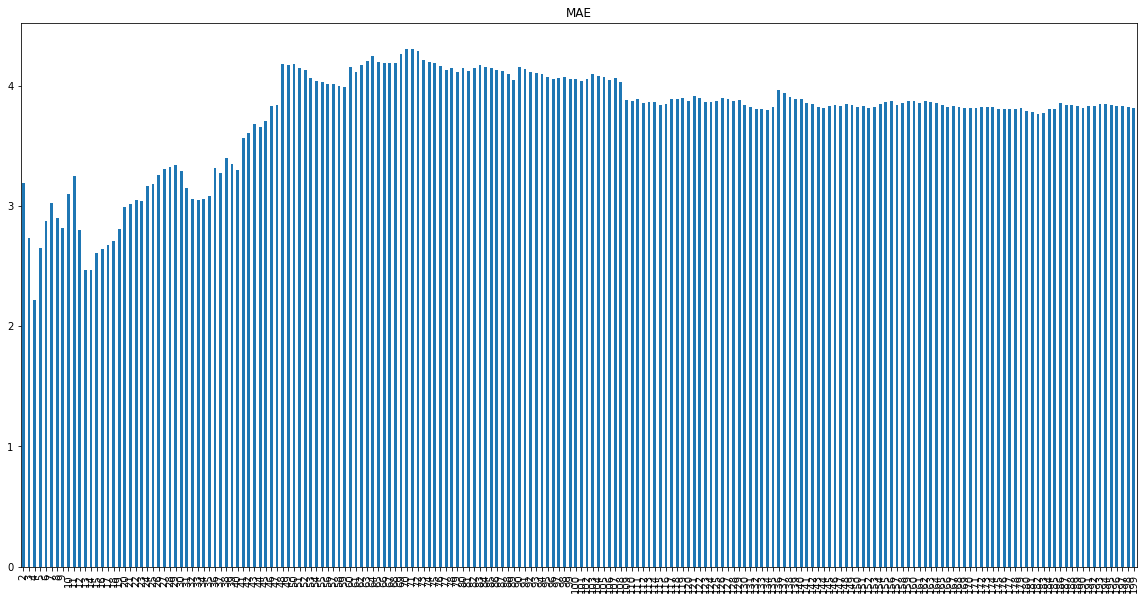

max: 0.04089430711665704
min: 0.02579410024879783


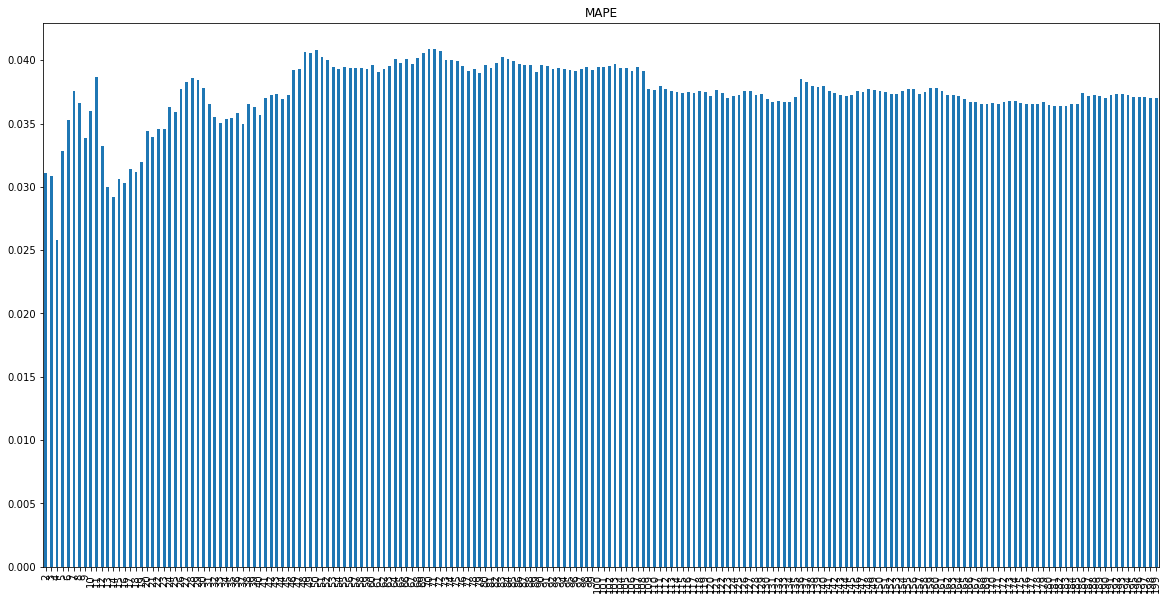

max: 6.378165604048173
min: 3.4966501826748413


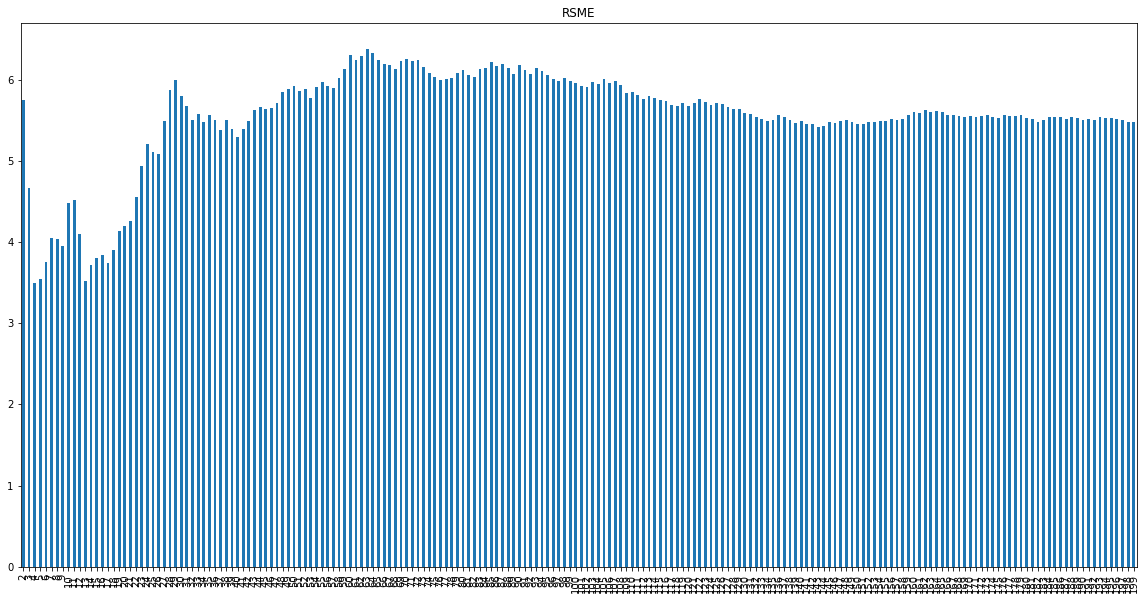

max: 0.9956477243021064
min: 0.9855188314529068


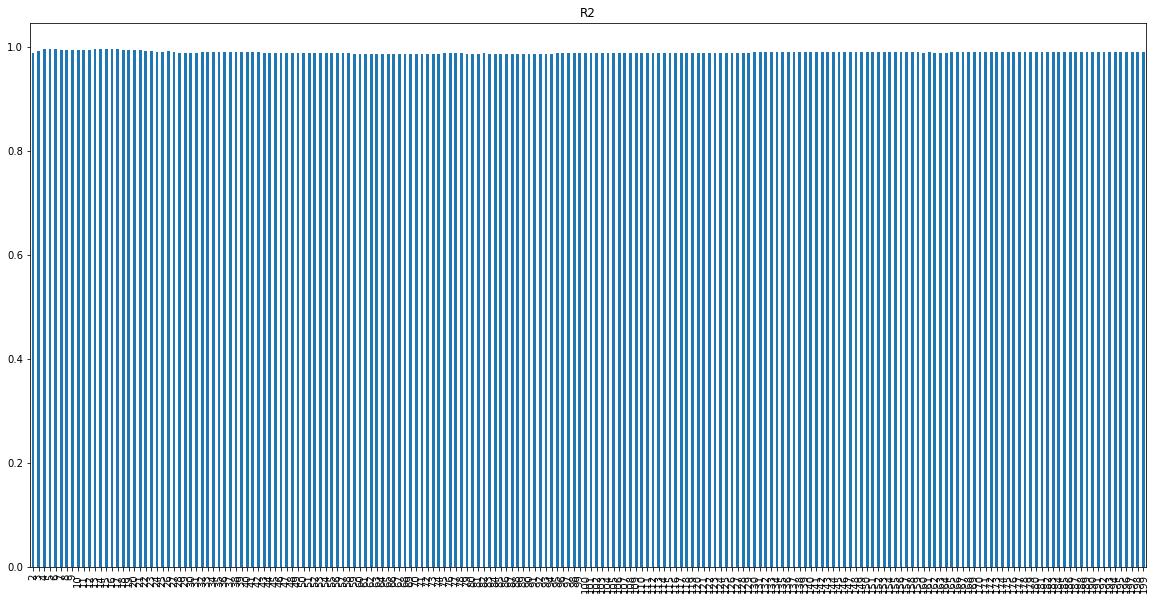

MIN_SAMPLES: 2
max: 11.965922619047623
min: 7.51666666666667


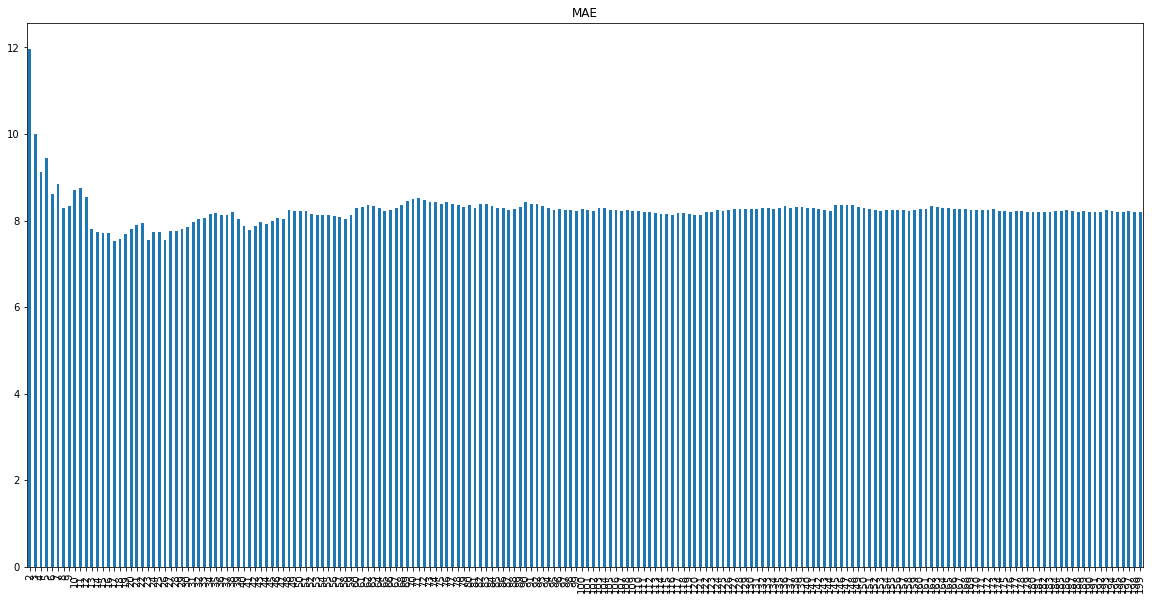

max: 0.09312008738324606
min: 0.06306789206375771


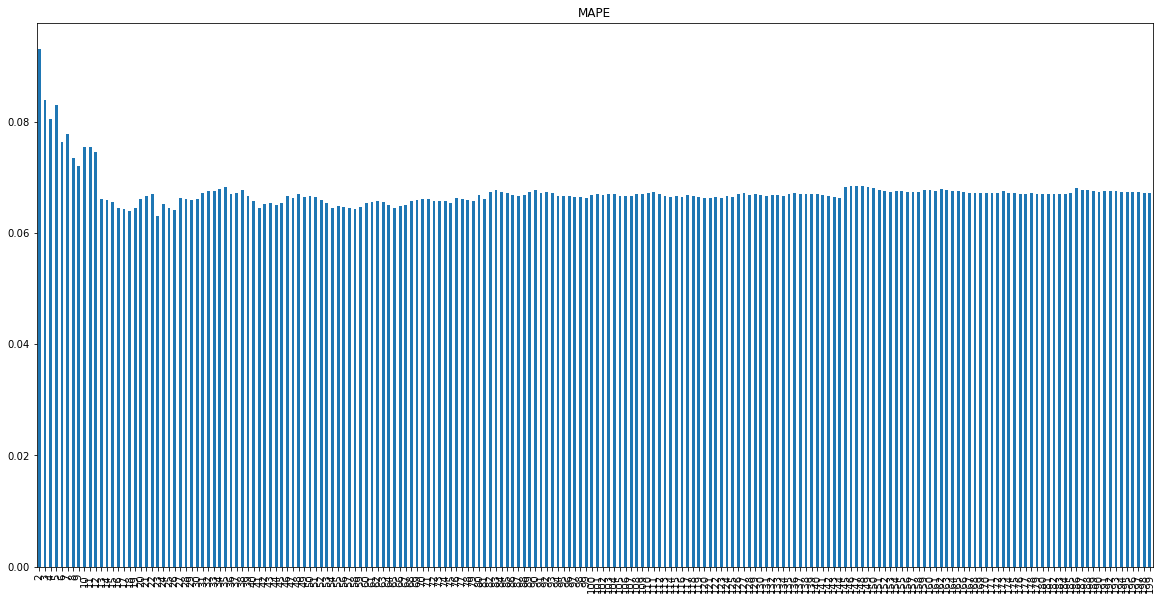

max: 19.168742063582847
min: 12.52746700932733


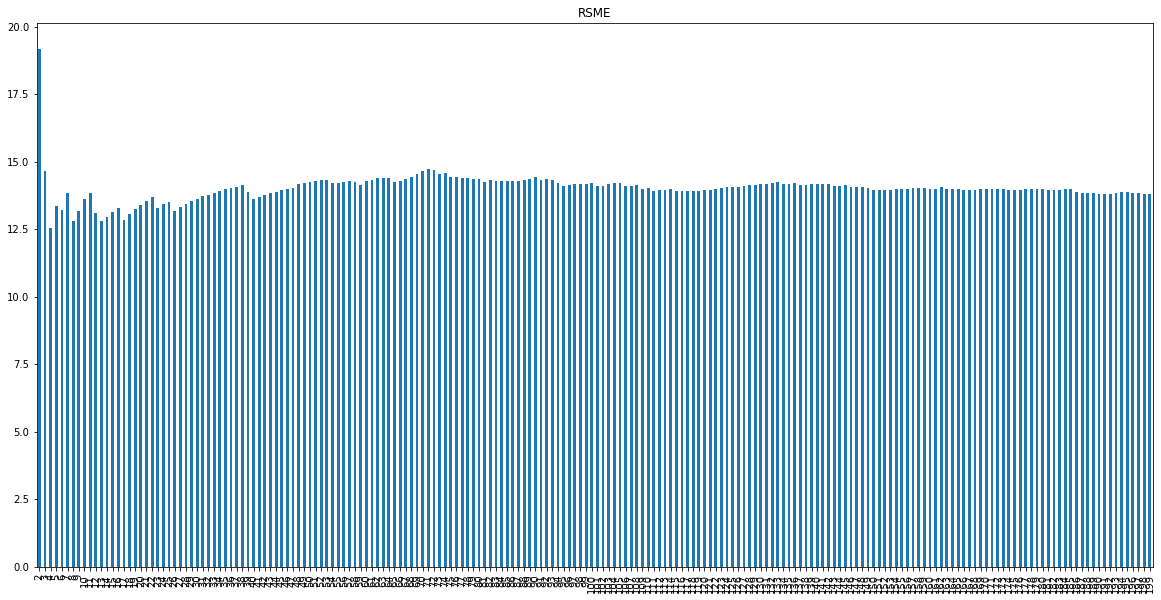

max: 0.9441351597195287
min: 0.8692025572625387


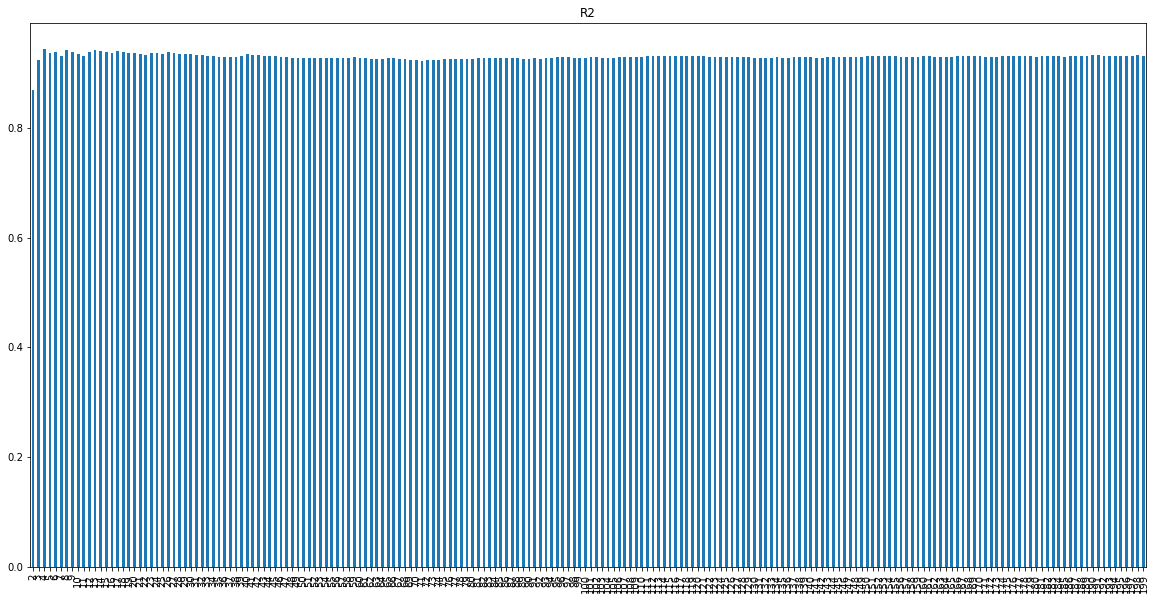

In [7]:
# iterating per number of min_samples and n_estimators
for min_sample in range(1,3):
    print("MIN_SAMPLES:", min_sample)
    score_list=[]
    n_list=[]
    for n in range (2,200):
        lista = training_RandomForestRegressor(X, y_AR, n_estimators=n, min_samples_leaf = min_sample)
        lista = lista[:-2]
        score_list.append(lista)
        n_list.append(n)

    df_scores = pd.DataFrame(data = score_list, index= n_list, columns = ['MAE','MAPE','RSME','R2'])

    for column in df_scores.columns:
        print("max:",df_scores[column].max())
        print("min:",df_scores[column].min())
        df_scores[column].plot(kind='bar', figsize=(20,10));
        plt.title(column)
        plt.show()
    

MAE train set: 7.51666666666667
MAPE train set:: 0.06431039857986895
RSME train set:: 12.850830112597896
R2 score train set:: 0.9412139349950632


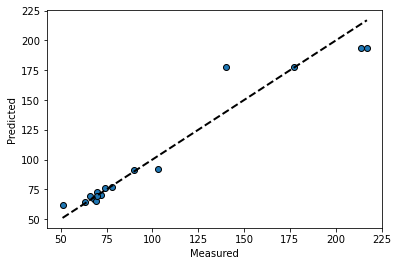

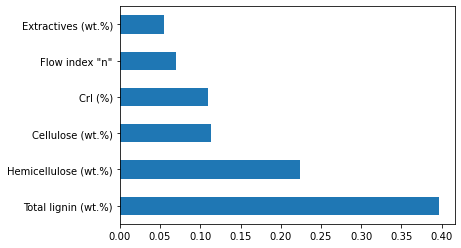

In [5]:
# Looking at the graphs above, we decide that n_estimators = 17 and min_leaf_samples = 2
# Now, we are going to fit the model with the best hyperparameters chosen. 

best_n1_AR = training_RandomForestRegressor(X, y_AR, print_out = True, n_estimators = 17, min_samples_leaf = 2)


In [6]:
best_n1_AR[4]

Cationic demand (µeq/g)              0.017171
Transmittance at 600 nm (%)          0.004594
HPH - Energy consumption (kWh/kg)    0.004221
Consistency index "k"                0.005749
Flow index "n"                       0.069829
Cellulose (wt.%)                     0.112970
Hemicellulose (wt.%)                 0.224410
Total lignin (wt.%)                  0.396323
Extractives (wt.%)                   0.055131
Ashes (wt.%)                         0.000000
CrI (%)                              0.109602
dtype: float64

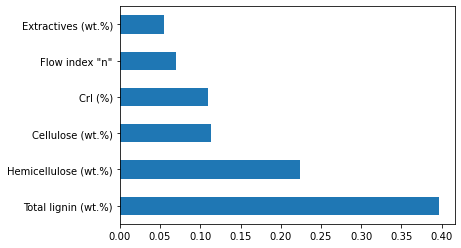

In [7]:
fig = best_n1_AR[4].nlargest(6).plot(kind='barh');
plt.savefig('FI_AR.png', dpi=600, bbox_inches = "tight")
plt.show()

MAE: 9.74735644257703
MAPE: 0.08789055466936663
RSME: 14.024965900127984
R2: 0.929981040296877


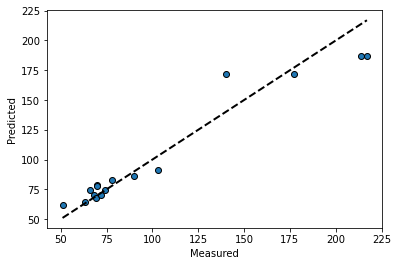

In [68]:
# checking this on 26.07.2022

train_allfeat = RandomForestRegressor(n_estimators=17, min_samples_leaf=2, random_state = 0)
train_allfeat.fit(X_train, y_train)

model_train_all_feat = train_allfeat.predict(X_train)

print ('MAE:', mean_absolute_error(y_train,model_train_all_feat))
print('MAPE:' , mean_absolute_percentage_error(y_train,model_train_all_feat))
print('RSME:' , mean_squared_error(y_train,model_train_all_feat, squared = False))
print('R2:' , r2_score(y_train,model_train_all_feat))

fig, ax = plt.subplots()
ax.scatter(y_train, model_train_all_feat, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

MAE: 9.813130252100837
MAPE: 0.05971859968249922
RSME: 16.917782095638664
R2: 0.9274771693816009


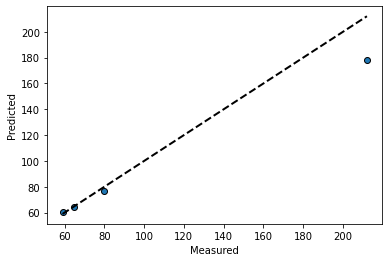

In [69]:
model_test_all_feat = train_allfeat.predict(X_test)

print ('MAE:', mean_absolute_error(y_test,model_test_all_feat))
print('MAPE:' , mean_absolute_percentage_error(y_test,model_test_all_feat))
print('RSME:' , mean_squared_error(y_test,model_test_all_feat, squared = False))
print('R2:' , r2_score(y_test,model_test_all_feat))

fig, ax = plt.subplots()
ax.scatter(y_test, model_test_all_feat, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [70]:
# Considering that more important features regard only the ones that have a score >=0.1, we choose
# the following variables: 

X_selected = X_train[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'CrI (%)']].copy()

# Getting rid of CrI because it may be a difficult analysis, and substituing it by Flow index 'n'
X_selected_flow = X_train[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Flow index "n"']].copy()

# Getting rid of Flow index 'n' and only using chemical components to predict
X_selected_chem = X_train[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Extractives (wt.%)']].copy()

# Getting rid of Flow index 'n' and putting consistency index 'k':
X_selected_chem_k = X_train[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Extractives (wt.%)', 'Consistency index "k"']].copy()

# Getting rid of consistency index 'k' and putting HPH energy:
X_selected_chem_hph = X_train[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Extractives (wt.%)', 'HPH - Energy consumption (kWh/kg)']].copy()

# Getting rid of extractives and putting HPH energy:
X_selected_hph = X_train[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'HPH - Energy consumption (kWh/kg)']].copy()

## Trying sth very different. It has nothing to do with the feature importance graphs showed above

X_train_alt_1 = X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)','Consistency index "k"']].copy()
X_train_alt = X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)','Consistency index "k"','Extractives (wt.%)']].copy()

In [71]:
model_selection = RandomForestRegressor(n_estimators=17, min_samples_leaf=2, random_state = 0)
model_selection.fit(X_selected, y_train)

RandomForestRegressor(min_samples_leaf=2, n_estimators=17, random_state=0)

MAE: 13.427547268907565
MAPE: 0.1279414356554888
RSME: 18.894069192157875
R2: 0.8729241483676315


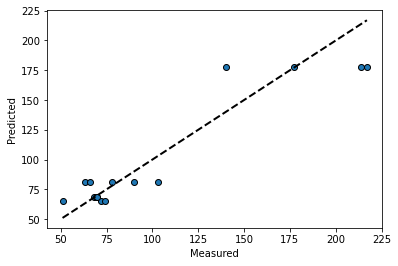

In [72]:
model_selection_pred = model_selection.predict(X_selected)

print ('MAE:', mean_absolute_error(y_train,model_selection_pred))
print('MAPE:' , mean_absolute_percentage_error(y_train,model_selection_pred))
print('RSME:' , mean_squared_error(y_train,model_selection_pred, squared = False))
print('R2:' , r2_score(y_train,model_selection_pred))

fig, ax = plt.subplots()
ax.scatter(y_train, model_selection_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

MAE: 8.844415266106445
MAPE: 0.0730449653835179
RSME: 14.490065754318742
R2: 0.9252600610924531


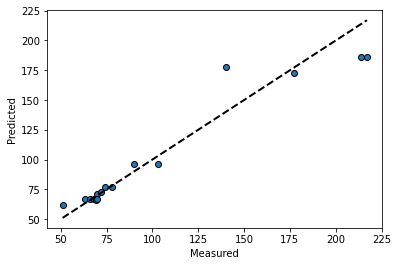

In [73]:
model_selection_flow = RandomForestRegressor(n_estimators=17, min_samples_leaf=2, random_state = 0)
model_selection_flow.fit(X_selected_flow, y_train)

model_selection_pred_flow = model_selection_flow.predict(X_selected_flow)

print ('MAE:', mean_absolute_error(y_train,model_selection_pred_flow))
print('MAPE:' , mean_absolute_percentage_error(y_train,model_selection_pred_flow))
print('RSME:' , mean_squared_error(y_train,model_selection_pred_flow, squared = False))
print('R2:' , r2_score(y_train,model_selection_pred_flow))

fig, ax = plt.subplots()
ax.scatter(y_train, model_selection_pred_flow, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [78]:
X_test_selected_flow = X_test[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Flow index "n"']].copy()

In [79]:
model_selection_flow.predict(X_test_selected_flow)

print ('MAE:', mean_absolute_error(y_test, model_selection_flow.predict(X_test_selected_flow)))
print('MAPE:' , mean_absolute_percentage_error(y_test, model_selection_flow.predict(X_test_selected_flow)))
print('RSME:' , mean_squared_error(y_test, model_selection_flow.predict(X_test_selected_flow), squared = False))
print('R2:' , r2_score(y_test, model_selection_flow.predict(X_test_selected_flow)))

MAE: 15.326365546218483
MAPE: 0.1380272850650309
RSME: 19.011973099902107
R2: 0.9084112197766625


MAE: 13.573007119514472
MAPE: 0.130789280428867
RSME: 18.877188165955463
R2: 0.8731511203820832


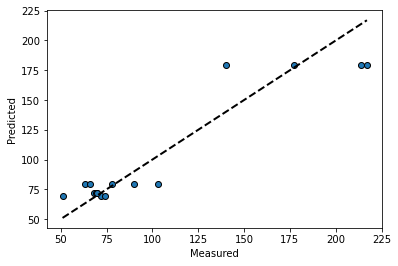

In [74]:
model_selection_chem = RandomForestRegressor(n_estimators=17, min_samples_leaf=2, random_state = 0)
model_selection_chem.fit(X_selected_chem, y_train)

model_selection_pred_chem = model_selection_chem.predict(X_selected_chem)

print ('MAE:', mean_absolute_error(y_train,model_selection_pred_chem))
print('MAPE:' , mean_absolute_percentage_error(y_train,model_selection_pred_chem))
print('RSME:' , mean_squared_error(y_train,model_selection_pred_chem, squared = False))
print('R2:' , r2_score(y_train,model_selection_pred_chem))

fig, ax = plt.subplots()
ax.scatter(y_train, model_selection_pred_chem, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

MAE: 11.783578431372547
MAPE: 0.11294550031953633
RSME: 15.969510041116552
R2: 0.9092189483288228


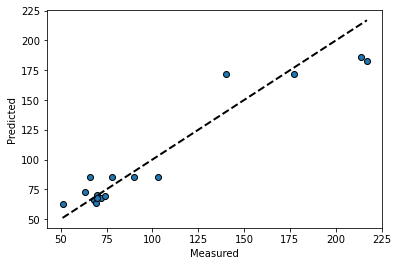

In [75]:
model_selection_chem_k = RandomForestRegressor(n_estimators=17, min_samples_leaf=2, random_state = 0)
model_selection_chem_k.fit(X_selected_chem_k, y_train)

model_selection_pred_chem_k = model_selection_chem_k.predict(X_selected_chem_k)

print ('MAE:', mean_absolute_error(y_train,model_selection_pred_chem_k))
print('MAPE:' , mean_absolute_percentage_error(y_train,model_selection_pred_chem_k))
print('RSME:' , mean_squared_error(y_train,model_selection_pred_chem_k, squared = False))
print('R2:' , r2_score(y_train,model_selection_pred_chem_k))

fig, ax = plt.subplots()
ax.scatter(y_train, model_selection_pred_chem_k, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

MAE: 10.019537815126053
MAPE: 0.09020044370281469
RSME: 14.236793356745068
R2: 0.9278499911269737


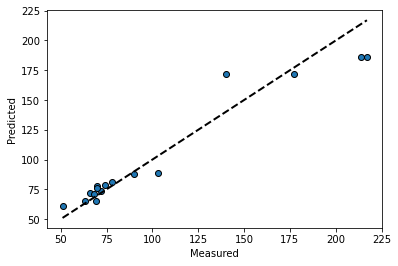

In [76]:
model_selection_chem_hph = RandomForestRegressor(n_estimators=17, min_samples_leaf=2, random_state = 0)
model_selection_chem_hph.fit(X_selected_chem_hph, y_train)

model_selection_pred_chem_hph = model_selection_chem_hph.predict(X_selected_chem_hph)

print ('MAE:', mean_absolute_error(y_train,model_selection_pred_chem_hph))
print('MAPE:' , mean_absolute_percentage_error(y_train,model_selection_pred_chem_hph))
print('RSME:' , mean_squared_error(y_train,model_selection_pred_chem_hph, squared = False))
print('R2:' , r2_score(y_train,model_selection_pred_chem_hph))

fig, ax = plt.subplots()
ax.scatter(y_train, model_selection_pred_chem_hph, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [ ]:
#Saving this last model

#final_model_AR = 'final_model_AR.pkl'
#pickle.dump(model_selection_chem_hph, open(final_model_AR, 'wb'))

In [ ]:
X_test_chem_hph = X_test[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Extractives (wt.%)', 'HPH - Energy consumption (kWh/kg)']].copy()

In [ ]:
model_selection_chem_hph.predict(X_test_chem_hph)

print ('MAE:', mean_absolute_error(y_test, model_selection_chem_hph.predict(X_test_chem_hph)))
print('MAPE:' , mean_absolute_percentage_error(y_test, model_selection_chem_hph.predict(X_test_chem_hph)))
print('RSME:' , mean_squared_error(y_test, model_selection_chem_hph.predict(X_test_chem_hph), squared = False))
print('R2:' , r2_score(y_test, model_selection_chem_hph.predict(X_test_chem_hph)))

In [ ]:
model_selection_chem_hph.predict(X_test_chem_hph)

In [ ]:
model_selection_hph = RandomForestRegressor(n_estimators=17, min_samples_leaf=2, random_state = 0)
model_selection_hph.fit(X_selected_hph, y_train)

model_selection_pred_hph = model_selection_hph.predict(X_selected_hph)

print ('MAE:', mean_absolute_error(y_train,model_selection_pred_hph))
print('MAPE:' , mean_absolute_percentage_error(y_train,model_selection_pred_hph))
print('RSME:' , mean_squared_error(y_train,model_selection_pred_hph, squared = False))
print('R2:' , r2_score(y_train,model_selection_pred_hph))

fig, ax = plt.subplots()
ax.scatter(y_train, model_selection_pred_hph, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [ ]:
X_test_hph = X_test[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'HPH - Energy consumption (kWh/kg)']].copy()

In [ ]:
model_selection_hph.predict(X_test_hph)

print ('MAE:', mean_absolute_error(y_test, model_selection_hph.predict(X_test_hph)))
print('MAPE:' , mean_absolute_percentage_error(y_test, model_selection_hph.predict(X_test_hph)))
print('RSME:' , mean_squared_error(y_test, model_selection_hph.predict(X_test_hph), squared = False))
print('R2:' , r2_score(y_test, model_selection_hph.predict(X_test_hph)))

fig, ax = plt.subplots()
ax.scatter(y_test, model_selection_hph.predict(X_test_hph), edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [ ]:
#Saving this last model

#final_model_AR_v2 = 'final_model_AR_v2.pkl'
#pickle.dump(model_selection_hph, open(final_model_AR_v2, 'wb'))

## Linear Regression for AR

In [12]:
from sklearn import preprocessing
from pickle import load

scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X_train)
e = scaler.transform(X_test)
f = scaler.fit_transform(X)

pickle.dump(scaler, open('final_scaler.pkl', 'wb'))

scaled_X_train = pd.DataFrame(d, columns = names)
scaled_X_test = pd.DataFrame(e, columns = names)
scaled_X = pd.DataFrame(f, columns = names)

In [13]:
LR_model = LinearRegression()

LR_model.fit(scaled_X_train, y_train)

LinearRegression()

In [14]:
LR_model_pred = LR_model.predict(scaled_X_train)

MAE: 4.7545202062755525
MAPE: 0.053947230141479216
RSME: 5.352695255096724
R2: 0.9898010124221355


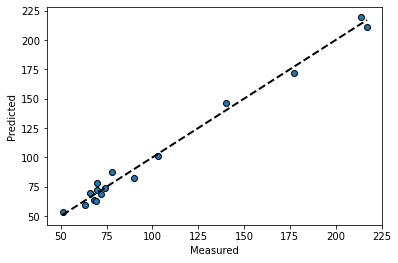

In [15]:
print ('MAE:', mean_absolute_error(y_train,LR_model_pred))
print('MAPE:' , mean_absolute_percentage_error(y_train,LR_model_pred))
print('RSME:' , mean_squared_error(y_train,LR_model_pred, squared = False))
print('R2:' , r2_score(y_train,LR_model_pred))

fig, ax = plt.subplots()
ax.scatter(y_train, LR_model_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [16]:
def metrics_and_plot(prediction, ytest):
    """This function is for computing MAE, MAPE, RSME and R² for regression models
    and also plot the graph predicted VS actual measure"""
    
    print ('MAE:', mean_absolute_error(ytest,prediction))
    print('MAPE:' , mean_absolute_percentage_error(ytest,prediction))
    print('RSME:' , mean_squared_error(ytest,prediction, squared = False))
    print('R2:' , r2_score(ytest,prediction))

    fig, ax = plt.subplots()
    ax.scatter(ytest, prediction, edgecolors=(0, 0, 0))
    ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--", lw=2)
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    plt.show()

MAE: 8.689162685523753
MAPE: 0.13131930054944674
RSME: 13.53780676484251
R2: 0.9535608230071669


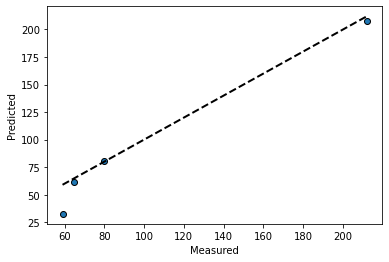

In [17]:
LR_model_pred_test = LR_model.predict(scaled_X_test)

metrics_and_plot(LR_model_pred_test, y_test)



In [18]:
LR_model_pred_df = pd.Series(LR_model_pred, index = X_train.index)

y_train_df = pd.Series(y_train, index = X_train.index)

new_df = pd.concat([LR_model_pred_df,y_train_df], axis = 1)
new_df.columns = ['Prediction', 'Target']
new_df

,Prediction,Target
10,59.534015,63
17,53.885127,51
6,69.502696,66
13,87.439117,78
4,146.228371,140
2,78.436022,70
5,63.848370,68
14,62.528374,69
9,69.213289,72
7,219.357595,214


In [19]:
LR_model_testpred_df = pd.Series(LR_model_pred_test, index = X_test.index)

y_test_df = pd.Series(y_test, index = X_test.index)

new_df_test = pd.concat([LR_model_testpred_df,y_test_df], axis = 1)
new_df_test.columns = ['Prediction', 'Target']
new_df_test

,Prediction,Target
18,32.536918,59
1,61.712223,65
19,207.322741,212
8,80.328533,80


In [20]:
coef = LR_model.coef_

In [21]:
coef = abs(coef)

In [22]:
coef_df = pd.DataFrame(data = coef)
coef_df['Feature'] = (['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Consistency index "k"',
       'Flow index "n"', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)',
       'Total lignin (wt.%)', 'Extractives (wt.%)', 'Ashes (wt.%)', 'CrI (%)'])

coef_df.columns = ['LR Weights', 'Feature']

coef_df.sort_values(by = ['LR Weights'], ascending = False)

,LR Weights,Feature
0,161.210161,Cationic demand (µeq/g)
8,68.331999,Extractives (wt.%)
1,60.735665,Transmittance at 600 nm (%)
9,52.418992,Ashes (wt.%)
2,46.868898,HPH - Energy consumption (kWh/kg)
3,41.801718,"Consistency index ""k"""
6,38.195796,Hemicellulose (wt.%)
4,20.371844,"Flow index ""n"""
10,20.073680,CrI (%)
5,19.167173,Cellulose (wt.%)


In [23]:
def training_LinearRegression(scaled_X, y, print_out = False):
    
    """
    This function will train and output results for the model
    
    Data should be already splitted into train and test subsets. Also X should already be scaled
    
    X -> DataFrame of the features, already scaled and already set to train subset
    y -> DataFrame of the targets
    """
    # instanciating the model
    LR_model = LinearRegression()

    # training the model
    LR_model.fit(scaled_X, y)
    
    # predicting the model with train set
    LRprediction_train = LR_model.predict(scaled_X)
    
    # output the results from train set
    MAE_LR = mean_absolute_error(y,LRprediction_train)
    MAPE_LR = mean_absolute_percentage_error(y,LRprediction_train)
    RSME_LR = mean_squared_error(y,LRprediction_train, squared = False)
    R2_LR = r2_score(y,LRprediction_train)
    
    if print_out == True:
        print("MAE train set:", MAE_LR)
        print("MAPE train set::", MAPE_LR)
        print("RSME train set::", RSME_LR)
        print("R2 score train set::", R2_LR)

        fig, ax = plt.subplots()
        ax.scatter(y, LRprediction_train, edgecolors=(0, 0, 0))
        ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=2)
        ax.set_xlabel("Measured")
        ax.set_ylabel("Predicted")
        plt.show()
    
    return [MAE_LR,MAPE_LR,RSME_LR,R2_LR,LR_model]
    

In [24]:
# Taking away weights that are below 30:

scaled_X_train_v2 = scaled_X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Consistency index "k"', 'Hemicellulose (wt.%)', 'Extractives (wt.%)', 'Ashes (wt.%)']]
scaled_X_train_v2

,Cationic demand (µeq/g),Transmittance at 600 nm (%),HPH - Energy consumption (kWh/kg),"Consistency index ""k""",Hemicellulose (wt.%),Extractives (wt.%),Ashes (wt.%)
0,0.136364,0.166667,0.000000,0.166231,0.556338,0.000000,0.333333
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.583333,1.000000
2,0.272727,0.392157,0.146619,0.639015,0.556338,0.000000,0.333333
3,0.439394,0.480392,0.427046,0.879497,0.556338,0.000000,0.333333
4,0.090909,0.284314,0.000000,0.262300,0.000000,1.000000,0.444444
5,1.000000,0.921569,1.000000,0.131338,1.000000,0.750000,0.000000
6,0.560606,0.441176,0.427046,0.052889,1.000000,0.750000,0.000000
7,0.378788,0.215686,0.146619,0.031433,1.000000,0.750000,0.000000
8,0.333333,0.333333,0.427046,0.076022,1.000000,0.583333,1.000000
9,0.803030,0.686275,0.634875,0.616057,0.000000,1.000000,0.444444


MAE train set: 4.894449887101366
MAPE train set:: 0.053937181530240026
RSME train set:: 5.475386372292798
R2 score train set:: 0.9893281044142536


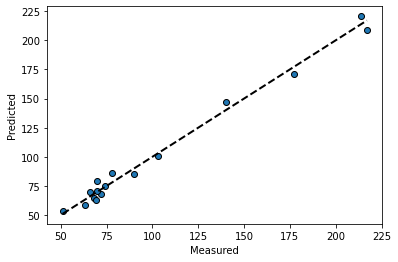

In [25]:
v2 = training_LinearRegression(scaled_X_train_v2, y_train, print_out = True)

In [26]:
v2_model = v2[4]

scaled_X_test_v2 = scaled_X_test[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Consistency index "k"', 'Hemicellulose (wt.%)', 'Extractives (wt.%)', 'Ashes (wt.%)']].copy()

v2_model.predict(scaled_X_test_v2)

print("MAE test set:", mean_absolute_error(y_test,v2_model.predict(scaled_X_test_v2)) )
print("MAPE test set::", mean_absolute_percentage_error(y_test,v2_model.predict(scaled_X_test_v2)))
print("RSME test set::", mean_squared_error(y_test,v2_model.predict(scaled_X_test_v2), squared = False))
print("R2 score test set::", r2_score(y_test,v2_model.predict(scaled_X_test_v2)) )

MAE test set: 10.35732537953481
MAPE test set:: 0.16255702721450221
RSME test set:: 15.809949842131864
R2 score test set:: 0.936664255920252


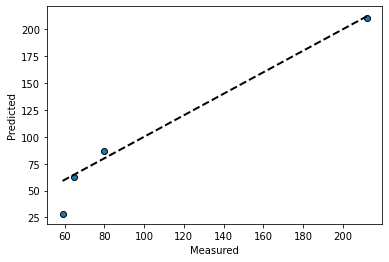

In [27]:
fig, ax = plt.subplots()
ax.scatter(y_test, v2_model.predict(scaled_X_test_v2), edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [28]:
# we can see that the model doesn't change much. So these features don't contribute much to the LR model.

In [29]:
# Taking away Hemicellulose

scaled_X_train_v3 = scaled_X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Consistency index "k"', 'Extractives (wt.%)', 'Ashes (wt.%)']]

MAE train set: 9.678366594567636
MAPE train set:: 0.13378795901317206
RSME train set:: 14.16853614214145
R2 score train set:: 0.9285401680266822


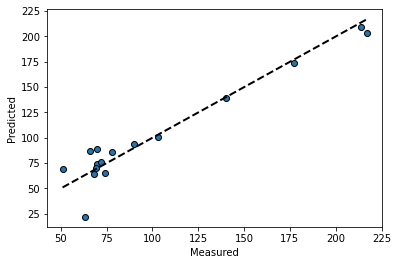

In [30]:
v3 = training_LinearRegression(scaled_X_train_v3, y_train, print_out = True)

In [31]:
v3_model = v3[4]

scaled_X_test_v3 = scaled_X_test[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Consistency index "k"', 'Extractives (wt.%)', 'Ashes (wt.%)']].copy()

v3_model.predict(scaled_X_test_v3)

print("MAE test set:", mean_absolute_error(y_test,v3_model.predict(scaled_X_test_v3)) )
print("MAPE test set::", mean_absolute_percentage_error(y_test,v3_model.predict(scaled_X_test_v3)))
print("RSME test set::", mean_squared_error(y_test,v3_model.predict(scaled_X_test_v3), squared = False))
print("R2 score test set::", r2_score(y_test,v3_model.predict(scaled_X_test_v3)) )

MAE test set: 27.45263721147708
MAPE test set:: 0.3020349984479617
RSME test set:: 36.241208378481296
R2 score test set:: 0.6671924021962491


In [32]:
v3_model.predict(scaled_X_test_v3)

array([ 44.74695999,  66.27653464, 182.24443454,  15.47459126])

MAE train set: 5.346987985277943
MAPE train set:: 0.05829796388456314
RSME train set:: 6.305080274394732
R2 score train set:: 0.9858488000786472


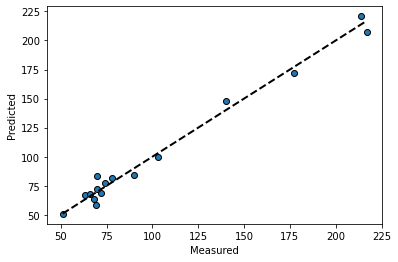

In [33]:
# Taking away consistency index 'k' but not hemicellulose:

scaled_X_train_v5 = scaled_X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Hemicellulose (wt.%)', 'Extractives (wt.%)', 'Ashes (wt.%)']]

v5 = training_LinearRegression(scaled_X_train_v5, y_train, print_out = True)

MAE train set: 18.14178231492491
MAPE train set:: 0.22685820820417846
RSME train set:: 22.16897277396245
R2 score train set:: 0.8250543428393409


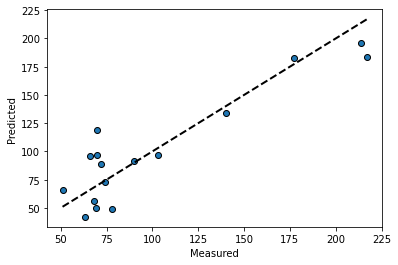

In [34]:
# Taking away Hemicellulose  and consistency index 'k':

scaled_X_train_v4 = scaled_X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)', 'Extractives (wt.%)', 'Ashes (wt.%)']]

v4 = training_LinearRegression(scaled_X_train_v4, y_train, print_out = True)

MAE train set: 8.379508499519801
MAPE train set:: 0.0926425448257312
RSME train set:: 11.816771613865397
R2 score train set:: 0.9502938976480896


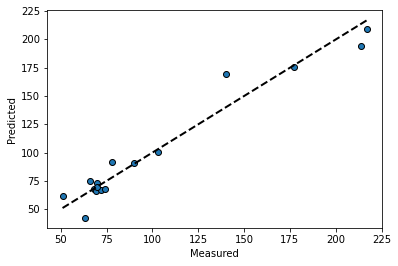

In [39]:
scaled_X_train_v7 = scaled_X_train[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Extractives (wt.%)', 'Consistency index "k"']]

v7 = training_LinearRegression(scaled_X_train_v7, y_train, print_out = True)

MAE train set: 7.107994859787276
MAPE train set:: 0.07252269056904621
RSME train set:: 10.826418923569657
R2 score train set:: 0.9582764087782362


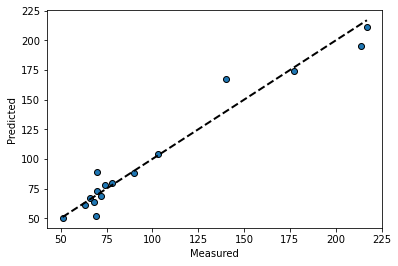

In [40]:
# Using only some chemical components and HPH. Did this on 22/04. Apparently, neither LR and RF need extractives for good performance.

scaled_X_train_v9 = scaled_X_train[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'HPH - Energy consumption (kWh/kg)']]

v9 = training_LinearRegression(scaled_X_train_v9, y_train, print_out = True)

In [41]:
v9_model = v9[4]
v9_model

LinearRegression()

In [42]:
scaled_X_test_v9 = scaled_X_test[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'HPH - Energy consumption (kWh/kg)']].copy()

v9_model.predict(scaled_X_test_v9)

print("MAE test set:", mean_absolute_error(y_test,v9_model.predict(scaled_X_test_v9)) )
print("MAPE test set::", mean_absolute_percentage_error(y_test,v9_model.predict(scaled_X_test_v9)))
print("RSME test set::", mean_squared_error(y_test,v9_model.predict(scaled_X_test_v9), squared = False) )
print("R2 score test set::", r2_score(y_test,v9_model.predict(scaled_X_test_v9)) )

MAE test set: 15.398043760552241
MAPE test set:: 0.16356970108101027
RSME test set:: 16.67270716083459
R2 score test set:: 0.9295631156541379


In [43]:
coef_v9 = v9_model.coef_
intercept_v9 = v9_model.intercept_
intercept_v9

804.4971385624015

In [44]:
#coef_v9 = abs(coef_v9)

In [45]:
coef_df9 = pd.DataFrame(data = coef_v9)
coef_df9['Feature'] = (['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'HPH - Energy consumption (kWh/kg)'])

coef_df9.columns = ['LR Weights', 'Feature']

coef_df9.sort_values(by = ['LR Weights'], ascending = False)

,LR Weights,Feature
3,43.433270,HPH - Energy consumption (kWh/kg)
0,-347.567207,Total lignin (wt.%)
2,-411.660970,Hemicellulose (wt.%)
1,-636.841173,Cellulose (wt.%)


In [46]:
#Saving this last model

#final_model_AR_LR_v2 = 'final_model_AR_LR_v2.pkl'
#pickle.dump(v9_model, open(final_model_AR_LR_v2, 'wb'))

MAE train set: 7.107994859787276
MAPE train set:: 0.07252269056904628
RSME train set:: 10.826418923569657
R2 score train set:: 0.9582764087782362


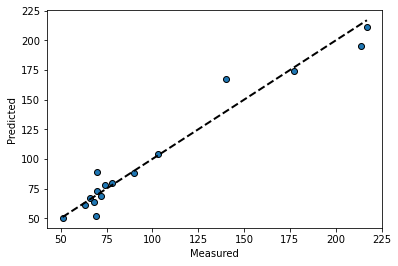

In [47]:
# Using only chemical components and HPH: 

scaled_X_train_v8 = scaled_X_train[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Extractives (wt.%)','HPH - Energy consumption (kWh/kg)']]

v8 = training_LinearRegression(scaled_X_train_v8, y_train, print_out = True)

In [48]:
v8_model = v8[4]
v8_model

LinearRegression()

In [49]:
#Saving this last model

#final_model_AR_LR = 'final_model_AR_LR.pkl'
#pickle.dump(v8_model, open(final_model_AR_LR, 'wb'))

In [50]:
scaled_X_test_v8 = scaled_X_test[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Extractives (wt.%)','HPH - Energy consumption (kWh/kg)']].copy()

v8_model.predict(scaled_X_test_v8)

print("MAE test set:", mean_absolute_error(y_test,v8_model.predict(scaled_X_test_v8)) )
print("MAPE test set::", mean_absolute_percentage_error(y_test,v8_model.predict(scaled_X_test_v8)))
print("RSME test set::", mean_squared_error(y_test,v8_model.predict(scaled_X_test_v8), squared = False) )
print("R2 score test set::", r2_score(y_test,v8_model.predict(scaled_X_test_v8)) )


MAE test set: 15.39804376055222
MAPE test set:: 0.16356970108101007
RSME test set:: 16.672707160834563
R2 score test set:: 0.9295631156541381


MAE train set: 12.379534811443008
MAPE train set:: 0.1443510075008761
RSME train set:: 14.940773583346708
R2 score train set:: 0.9205382373021721


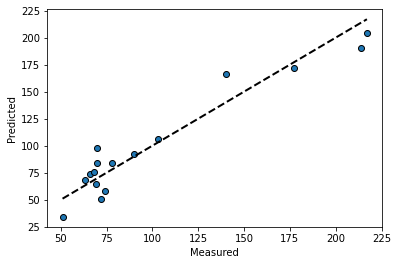

In [51]:
# Using only 3 inputs, like the RF,  don't think it was tested yet.

scaled_X_train_varticle = scaled_X_train[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'HPH - Energy consumption (kWh/kg)']]

varticle = training_LinearRegression(scaled_X_train_varticle, y_train, print_out = True)

In [52]:
varticle_model = varticle[4]
varticle_model

LinearRegression()

In [53]:
#Saving this last model

#final_model_AR_LR = 'final_model_AR_LR.pkl'
#pickle.dump(v8_model, open(final_model_AR_LR, 'wb'))

In [55]:
scaled_X_test_varticle = scaled_X_test[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'HPH - Energy consumption (kWh/kg)']].copy()

varticle_model.predict(scaled_X_test_varticle)

print("MAE test set:", mean_absolute_error(y_test,varticle_model.predict(scaled_X_test_varticle)) )
print("MAPE test set::", mean_absolute_percentage_error(y_test,varticle_model.predict(scaled_X_test_varticle)))
print("RSME test set::", mean_squared_error(y_test,varticle_model.predict(scaled_X_test_varticle), squared = False) )
print("R2 score test set::", r2_score(y_test,varticle_model.predict(scaled_X_test_varticle)) )


MAE test set: 15.668128506878531
MAPE test set:: 0.15736571791114962
RSME test set:: 19.749394946627838
R2 score test set:: 0.9011684782065402


## Neural Networks

In [56]:
# importing relevant libraries for NN

import tensorflow as tf
tf.random.set_seed(42) 

In [58]:
def neural_networks_model_SIMPLE (scaledX, ytrain,inputsize = 11, hiddenlayer_size = 50, batch_size = 4, max_epochs = 100, initial_learning_rate = 0.01):
    
    global initial_history
    # We already have a train and test sets, already scaled. Therefore, let's create the model

    # Defining the input, output and hidden layer sizes:

    input_size = inputsize #Correspond to the number of features in scaled_X_train
    output_size = 1 #We only have one output (Aspect Ratio)
    hidden_layer_size = hiddenlayer_size #50 is used as an initial value , since we don't know yet the optimal size of the hidden layers.

    # Last layer is linear since we are working with a classification problem. 
    nn_model = tf.keras.Sequential([
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(output_size, activation = 'linear')
                            ])


    #lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
     #   initial_learning_rate,
      #  decay_steps=50000,
       # decay_rate=0.9,
        #staircase=True) 

    opt = tf.keras.optimizers.Adam(learning_rate= initial_learning_rate) #learning_rate= initial_learning_rate, beta_1 = 0.9

    # 
    nn_model.compile(optimizer = opt, 
                     loss = [tf.keras.losses.MeanAbsoluteError(name='mean_absolute_error')], 
                     metrics=[tf.keras.metrics.MeanAbsolutePercentageError(name='mean_absolute_percentage_error')])


    #early_stopping = tf.keras.callbacks.EarlyStopping(
     #   min_delta=0.001,
      #  patience=5,
       # restore_best_weights=True,
        #) 

    initial_history  = nn_model.fit(scaledX,
             ytrain,
             batch_size = batch_size,
             epochs = max_epochs,
             #callbacks=[
                 #tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 * (epoch/30))],
             verbose=2)
    return [nn_model]

In [90]:
# I'll try to use the feature previously chosen for the other models, and see if it is adequate

scaled_X_train_chem = scaled_X_train[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Extractives (wt.%)','HPH - Energy consumption (kWh/kg)']].copy()
scaled_X_test_chem = scaled_X_test[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Extractives (wt.%)','HPH - Energy consumption (kWh/kg)']].copy()
scaled_X_train_woextract = scaled_X_train[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)','HPH - Energy consumption (kWh/kg)']].copy()
scaled_X_test_woextract = scaled_X_test[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)','HPH - Energy consumption (kWh/kg)']].copy()

### Trying to see if other parameters would be a good fit for the model:

scaled_X_train_alt_2 = scaled_X_train[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)']].copy()
scaled_X_test_alt_2 = scaled_X_test[['Cationic demand (µeq/g)', 'Transmittance at 600 nm (%)',
       'HPH - Energy consumption (kWh/kg)']].copy()

In [234]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [286]:
v_6 = neural_networks_model_SIMPLE (scaled_X_train_chem, 
                                    y_train,
                                    inputsize = 5, 
                                    hiddenlayer_size = 15, 
                                    batch_size = 4, 
                                    max_epochs = 100, 
                                    initial_learning_rate = 0.01)

Epoch 1/100
4/4 - 0s - loss: 101.0649 - mean_absolute_percentage_error: 99.7516
Epoch 2/100
4/4 - 0s - loss: 100.6816 - mean_absolute_percentage_error: 99.3062
Epoch 3/100
4/4 - 0s - loss: 100.2186 - mean_absolute_percentage_error: 98.7529
Epoch 4/100
4/4 - 0s - loss: 99.6243 - mean_absolute_percentage_error: 98.0621
Epoch 5/100
4/4 - 0s - loss: 98.8943 - mean_absolute_percentage_error: 97.2519
Epoch 6/100
4/4 - 0s - loss: 98.0030 - mean_absolute_percentage_error: 96.1367
Epoch 7/100
4/4 - 0s - loss: 96.8909 - mean_absolute_percentage_error: 94.8834
Epoch 8/100
4/4 - 0s - loss: 95.6224 - mean_absolute_percentage_error: 93.4240
Epoch 9/100
4/4 - 0s - loss: 94.1137 - mean_absolute_percentage_error: 91.5759
Epoch 10/100
4/4 - 0s - loss: 92.4176 - mean_absolute_percentage_error: 89.6193
Epoch 11/100
4/4 - 0s - loss: 90.5150 - mean_absolute_percentage_error: 87.1501
Epoch 12/100
4/4 - 0s - loss: 88.3905 - mean_absolute_percentage_error: 84.7313
Epoch 13/100
4/4 - 0s - loss: 86.0017 - mean_a

In [287]:
# We can see from above that fewer parameters work better, the loss and metric function don't fluctuate much, keep continuously decreasing

In [288]:
nn_simple_model = v_6[0]
nn_simple_model_predictions = nn_simple_model.predict(scaled_X_train_chem)

print("MAE test set:", mean_absolute_error(y_train,nn_simple_model_predictions))
print("MAPE test set::", mean_absolute_percentage_error(y_train,nn_simple_model_predictions))
print("RSME test set::", mean_squared_error(y_train,nn_simple_model_predictions, squared = False) )
print("R2 score test set::", r2_score(y_train,nn_simple_model_predictions))

MAE test set: 11.237299919128418
MAPE test set:: 0.0970709143765193
RSME test set:: 16.567746772969066
R2 score test set:: 0.9022900205209019


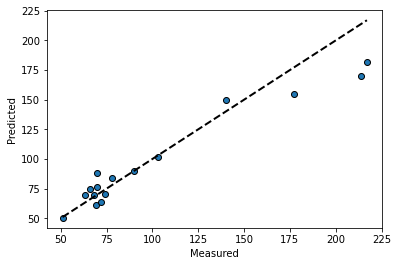

In [289]:
fig, ax = plt.subplots()
ax.scatter(y_train, nn_simple_model_predictions, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [329]:
nn_simple_test_predictions = nn_simple_model.predict(scaled_X_test_chem)

print("MAE test set:", mean_absolute_error(y_test,nn_simple_test_predictions))
print("MAPE test set::", mean_absolute_percentage_error(y_test,nn_simple_test_predictions))
print("RSME test set::", mean_squared_error(y_test,nn_simple_test_predictions, squared = False) )
print("R2 score test set::", r2_score(y_test,nn_simple_test_predictions))

MAE test set: 15.913721084594727
MAPE test set:: 0.11528394109299402
RSME test set:: 24.73923501182912
R2 score test set:: 0.8449183456301756


In [292]:
v_7 = neural_networks_model_SIMPLE (scaled_X_train_chem, 
                                    y_train,
                                    inputsize = 5, 
                                    hiddenlayer_size = 20, 
                                    batch_size = 4, 
                                    max_epochs = 100, 
                                    initial_learning_rate = 0.02)

Epoch 1/100
4/4 - 0s - loss: 100.8560 - mean_absolute_percentage_error: 99.4846
Epoch 2/100
4/4 - 0s - loss: 99.5304 - mean_absolute_percentage_error: 97.9381
Epoch 3/100
4/4 - 0s - loss: 97.7091 - mean_absolute_percentage_error: 95.7755
Epoch 4/100
4/4 - 0s - loss: 95.1438 - mean_absolute_percentage_error: 92.7997
Epoch 5/100
4/4 - 0s - loss: 91.7671 - mean_absolute_percentage_error: 89.0073
Epoch 6/100
4/4 - 0s - loss: 87.5119 - mean_absolute_percentage_error: 83.6437
Epoch 7/100
4/4 - 0s - loss: 82.2768 - mean_absolute_percentage_error: 77.6578
Epoch 8/100
4/4 - 0s - loss: 76.1770 - mean_absolute_percentage_error: 70.5880
Epoch 9/100
4/4 - 0s - loss: 68.8173 - mean_absolute_percentage_error: 61.5415
Epoch 10/100
4/4 - 0s - loss: 60.4262 - mean_absolute_percentage_error: 51.8180
Epoch 11/100
4/4 - 0s - loss: 50.8457 - mean_absolute_percentage_error: 39.3487
Epoch 12/100
4/4 - 0s - loss: 42.0116 - mean_absolute_percentage_error: 30.3315
Epoch 13/100
4/4 - 0s - loss: 41.9432 - mean_abs

In [293]:
nn_simple_model_v_7 = v_7[0]
nn_simple_model_pred = nn_simple_model_v_7.predict(scaled_X_train_chem)

print("MAE test set:", mean_absolute_error(y_train,nn_simple_model_pred) )
print("MAPE test set::", mean_absolute_percentage_error(y_train,nn_simple_model_pred))
print("RSME test set::", mean_squared_error(y_train,nn_simple_model_pred, squared = False) )
print("R2 score test set::", r2_score(y_train,nn_simple_model_pred) )

MAE test set: 7.767042636871338
MAPE test set:: 0.08518887576619841
RSME test set:: 12.400048906191795
R2 score test set:: 0.9452657940382961


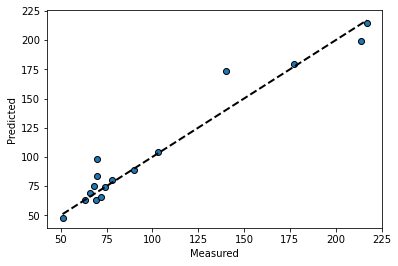

In [294]:
fig, ax = plt.subplots()
ax.scatter(y_train, nn_simple_model_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [330]:
nn_simple_test_pred = nn_simple_model_v_7.predict(scaled_X_test_chem)

print("MAE test set:", mean_absolute_error(y_test,nn_simple_test_pred))
print("MAPE test set::", mean_absolute_percentage_error(y_test,nn_simple_test_pred))
print("RSME test set::", mean_squared_error(y_test,nn_simple_test_pred, squared = False) )
print("R2 score test set::", r2_score(y_test,nn_simple_test_pred))

MAE test set: 10.782327651977539
MAPE test set:: 0.10395673863172432
RSME test set:: 12.779852670131023
R2 score test set:: 0.9586153213555669


In [331]:
#nn_simple_model_v_7.save(r'C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN AR 20neuron')

INFO:tensorflow:Assets written to: C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN AR 20neuron\assets


In [324]:
v_8 = neural_networks_model_SIMPLE (scaled_X_train_chem, 
                                    y_train,
                                    inputsize = 5, 
                                    hiddenlayer_size = 12, 
                                    batch_size = 4, 
                                    max_epochs = 100, 
                                    initial_learning_rate = 0.01)

Epoch 1/100
4/4 - 0s - loss: 101.6154 - mean_absolute_percentage_error: 100.3528
Epoch 2/100
4/4 - 0s - loss: 101.1979 - mean_absolute_percentage_error: 99.8399
Epoch 3/100
4/4 - 0s - loss: 100.7249 - mean_absolute_percentage_error: 99.2557
Epoch 4/100
4/4 - 0s - loss: 100.2038 - mean_absolute_percentage_error: 98.6221
Epoch 5/100
4/4 - 0s - loss: 99.6453 - mean_absolute_percentage_error: 97.9640
Epoch 6/100
4/4 - 0s - loss: 98.9803 - mean_absolute_percentage_error: 97.1086
Epoch 7/100
4/4 - 0s - loss: 98.2379 - mean_absolute_percentage_error: 96.2470
Epoch 8/100
4/4 - 0s - loss: 97.4334 - mean_absolute_percentage_error: 95.3034
Epoch 9/100
4/4 - 0s - loss: 96.5044 - mean_absolute_percentage_error: 94.1510
Epoch 10/100
4/4 - 0s - loss: 95.4980 - mean_absolute_percentage_error: 92.9779
Epoch 11/100
4/4 - 0s - loss: 94.3839 - mean_absolute_percentage_error: 91.5227
Epoch 12/100
4/4 - 0s - loss: 93.1612 - mean_absolute_percentage_error: 90.1169
Epoch 13/100
4/4 - 0s - loss: 91.7853 - mean

In [322]:
nn_simple_model_v_8 = v_8[0]
nn_simple_model_pred8 = nn_simple_model_v_8.predict(scaled_X_train_chem)

print("MAE test set:", mean_absolute_error(y_train,nn_simple_model_pred8))
print("MAPE test set::", mean_absolute_percentage_error(y_train,nn_simple_model_pred8))
print("RSME test set::", mean_squared_error(y_train,nn_simple_model_pred8, squared = False))
print("R2 score test set::", r2_score(y_train,nn_simple_model_pred8) )

MAE test set: 15.200305700302124
MAPE test set:: 0.11676092738932295
RSME test set:: 24.90606811312342
R2 score test set:: 0.7791881537632319


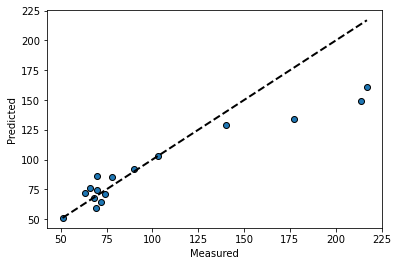

In [323]:
fig, ax = plt.subplots()
ax.scatter(y_train, nn_simple_model_pred8, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [325]:
v_9 = neural_networks_model_SIMPLE (scaled_X_train, 
                                    y_train,
                                    inputsize = 11, 
                                    hiddenlayer_size = 33, 
                                    batch_size = 4, 
                                    max_epochs = 100, 
                                    initial_learning_rate = 0.01)

Epoch 1/100
4/4 - 1s - loss: 101.4641 - mean_absolute_percentage_error: 100.1587
Epoch 2/100
4/4 - 0s - loss: 100.4230 - mean_absolute_percentage_error: 98.9784
Epoch 3/100
4/4 - 0s - loss: 99.2430 - mean_absolute_percentage_error: 97.6402
Epoch 4/100
4/4 - 0s - loss: 97.6859 - mean_absolute_percentage_error: 95.9004
Epoch 5/100
4/4 - 0s - loss: 95.6470 - mean_absolute_percentage_error: 93.6826
Epoch 6/100
4/4 - 0s - loss: 93.1250 - mean_absolute_percentage_error: 90.6144
Epoch 7/100
4/4 - 0s - loss: 90.0025 - mean_absolute_percentage_error: 87.1844
Epoch 8/100
4/4 - 0s - loss: 86.3234 - mean_absolute_percentage_error: 83.0740
Epoch 9/100
4/4 - 0s - loss: 81.9844 - mean_absolute_percentage_error: 77.9065
Epoch 10/100
4/4 - 0s - loss: 76.9159 - mean_absolute_percentage_error: 72.2801
Epoch 11/100
4/4 - 0s - loss: 71.3241 - mean_absolute_percentage_error: 65.1781
Epoch 12/100
4/4 - 0s - loss: 64.7207 - mean_absolute_percentage_error: 57.9316
Epoch 13/100
4/4 - 0s - loss: 57.4089 - mean_a

In [327]:
#nn_simple_model_v_9 = v_9[0] Nao rodar de novo pq perdi
nn_simple_model_pred9 = nn_simple_model_v_9.predict(scaled_X_train)

print("MAE test set:", mean_absolute_error(y_train,nn_simple_model_pred9))
print("MAPE test set::", mean_absolute_percentage_error(y_train,nn_simple_model_pred9))
print("RSME test set::", mean_squared_error(y_train,nn_simple_model_pred9, squared = False))
print("R2 score test set::", r2_score(y_train,nn_simple_model_pred9))

MAE test set: 6.968903541564941
MAPE test set:: 0.07032364856708623
RSME test set:: 10.852851418150058
R2 score test set:: 0.9580724253723253


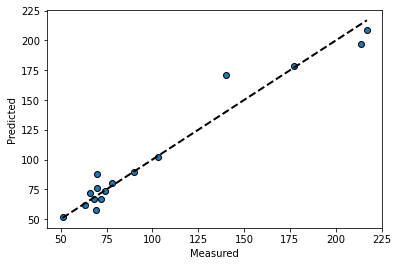

In [328]:
fig, ax = plt.subplots()
ax.scatter(y_train, nn_simple_model_pred9, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [362]:
nn_simple_test_pred9 = nn_simple_model_v_9.predict(scaled_X_test)

print("MAE test set:", mean_absolute_error(y_test,nn_simple_test_pred9))
print("MAPE test set::", mean_absolute_percentage_error(y_test,nn_simple_test_pred9))
print("RSME test set::", mean_squared_error(y_test,nn_simple_test_pred9, squared = False))
print("R2 score test set::", r2_score(y_test,nn_simple_test_pred9))

MAE test set: 10.83241081237793
MAPE test set:: 0.10453895989978935
RSME test set:: 13.542179933587207
R2 score test set:: 0.9535308153164445


In [16]:
# I'll try to use the feature previously chosen for the other models, minus the HPH, and see if it fits better.

scaled_X_train_chemonly = scaled_X_train[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Extractives (wt.%)', 'Consistency index "k"']].copy()
scaled_X_test_chemonly = scaled_X_test[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Extractives (wt.%)','Consistency index "k"']].copy()

In [339]:
v_10 = neural_networks_model_SIMPLE (scaled_X_train_chemonly, 
                                    y_train,
                                    inputsize = 5, 
                                    hiddenlayer_size = 20, 
                                    batch_size = 4, 
                                    max_epochs = 100, 
                                    initial_learning_rate = 0.02)

Epoch 1/100
4/4 - 0s - loss: 101.1559 - mean_absolute_percentage_error: 99.6817
Epoch 2/100
4/4 - 0s - loss: 99.9263 - mean_absolute_percentage_error: 98.1546
Epoch 3/100
4/4 - 0s - loss: 98.6874 - mean_absolute_percentage_error: 96.6216
Epoch 4/100
4/4 - 0s - loss: 97.1670 - mean_absolute_percentage_error: 94.8176
Epoch 5/100
4/4 - 0s - loss: 95.3105 - mean_absolute_percentage_error: 92.7046
Epoch 6/100
4/4 - 0s - loss: 93.0486 - mean_absolute_percentage_error: 89.8360
Epoch 7/100
4/4 - 0s - loss: 90.3411 - mean_absolute_percentage_error: 86.7321
Epoch 8/100
4/4 - 0s - loss: 87.1288 - mean_absolute_percentage_error: 82.9915
Epoch 9/100
4/4 - 0s - loss: 83.3156 - mean_absolute_percentage_error: 78.3137
Epoch 10/100
4/4 - 0s - loss: 78.9476 - mean_absolute_percentage_error: 73.2363
Epoch 11/100
4/4 - 0s - loss: 73.9541 - mean_absolute_percentage_error: 66.7464
Epoch 12/100
4/4 - 0s - loss: 68.3300 - mean_absolute_percentage_error: 60.3202
Epoch 13/100
4/4 - 0s - loss: 61.9288 - mean_abs

In [340]:
nn_simple_model_v_10 = v_10[0]
nn_simple_model_pred10 = nn_simple_model_v_10.predict(scaled_X_train_chemonly)

print("MAE test set:", mean_absolute_error(y_train,nn_simple_model_pred10))
print("MAPE test set::", mean_absolute_percentage_error(y_train,nn_simple_model_pred10))
print("RSME test set::", mean_squared_error(y_train,nn_simple_model_pred10, squared = False))
print("R2 score test set::", r2_score(y_train,nn_simple_model_pred10))

MAE test set: 9.568382263183594
MAPE test set:: 0.09304758837334244
RSME test set:: 13.716197555407224
R2 score test set:: 0.9330301248435495


In [342]:
nn_simple_model_test10 = nn_simple_model_v_10.predict(scaled_X_test_chemonly)

print("MAE test set:", mean_absolute_error(y_test,nn_simple_model_test10))
print("MAPE test set::", mean_absolute_percentage_error(y_test,nn_simple_model_test10))
print("RSME test set::", mean_squared_error(y_test,nn_simple_model_test10, squared = False))
print("R2 score test set::", r2_score(y_test,nn_simple_model_test10))

MAE test set: 15.587054252624512
MAPE test set:: 0.15561221979666787
RSME test set:: 17.710134596791054
R2 score test set:: 0.9205248023726199


In [343]:
#nn_simple_model_v_10.save(r'C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN AR 20n_conK')

INFO:tensorflow:Assets written to: C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN AR 20n_conK\assets


In [347]:
# I'll try to use the feature previously chosen for the other models, minus the HPH, and see if it fits better.

scaled_X_train_hphK = scaled_X_train[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Extractives (wt.%)', 'Consistency index "k"','HPH - Energy consumption (kWh/kg)']].copy()
scaled_X_test_hphK = scaled_X_test[['Total lignin (wt.%)', 'Cellulose (wt.%)', 'Hemicellulose (wt.%)', 'Extractives (wt.%)','Consistency index "k"','HPH - Energy consumption (kWh/kg)']].copy()

In [358]:
v_12 = neural_networks_model_SIMPLE (scaled_X_train_chem, 
                                    y_train,
                                    inputsize = 5, 
                                    hiddenlayer_size = 15, 
                                    batch_size = 4, 
                                    max_epochs = 100)

Epoch 1/100
4/4 - 0s - loss: 101.7215 - mean_absolute_percentage_error: 100.5003
Epoch 2/100
4/4 - 0s - loss: 101.1108 - mean_absolute_percentage_error: 99.7754
Epoch 3/100
4/4 - 0s - loss: 100.4842 - mean_absolute_percentage_error: 99.0277
Epoch 4/100
4/4 - 0s - loss: 99.8168 - mean_absolute_percentage_error: 98.2545
Epoch 5/100
4/4 - 0s - loss: 99.1468 - mean_absolute_percentage_error: 97.5094
Epoch 6/100
4/4 - 0s - loss: 98.4444 - mean_absolute_percentage_error: 96.6276
Epoch 7/100
4/4 - 0s - loss: 97.6520 - mean_absolute_percentage_error: 95.7344
Epoch 8/100
4/4 - 0s - loss: 96.7948 - mean_absolute_percentage_error: 94.7509
Epoch 9/100
4/4 - 0s - loss: 95.8219 - mean_absolute_percentage_error: 93.5631
Epoch 10/100
4/4 - 0s - loss: 94.7606 - mean_absolute_percentage_error: 92.3450
Epoch 11/100
4/4 - 0s - loss: 93.6037 - mean_absolute_percentage_error: 90.8486
Epoch 12/100
4/4 - 0s - loss: 92.3252 - mean_absolute_percentage_error: 89.4007
Epoch 13/100
4/4 - 0s - loss: 90.9118 - mean_

In [360]:
nn_simple_model_v_12 = v_12[0]
nn_simple_model_pred12 = nn_simple_model_v_12.predict(scaled_X_train_chem)

print("MAE test set:", mean_absolute_error(y_train,nn_simple_model_pred12))
print("MAPE test set::", mean_absolute_percentage_error(y_train,nn_simple_model_pred12))
print("RSME test set::", mean_squared_error(y_train,nn_simple_model_pred12, squared = False))
print("R2 score test set::", r2_score(y_train,nn_simple_model_pred12))

MAE test set: 12.349490404129028
MAPE test set:: 0.100416516220351
RSME test set:: 19.877488311754377
R2 score test set:: 0.8593515211474899


In [361]:
nn_simple_model_test12 = nn_simple_model_v_12.predict(scaled_X_test_chem)

print("MAE test set:", mean_absolute_error(y_test,nn_simple_model_test12))
print("MAPE test set::", mean_absolute_percentage_error(y_test,nn_simple_model_test12))
print("RSME test set::", mean_squared_error(y_test,nn_simple_model_test12, squared = False))
print("R2 score test set::", r2_score(y_test,nn_simple_model_test12))

MAE test set: 17.792837142944336
MAPE test set:: 0.12242597924372985
RSME test set:: 29.024446763305434
R2 score test set:: 0.786540349698226


In [364]:
v_13 = neural_networks_model_SIMPLE (scaled_X_train, 
                                    y_train,
                                    inputsize = 11, 
                                    hiddenlayer_size = 22, 
                                    batch_size = 4, 
                                    max_epochs = 100, 
                                    initial_learning_rate = 0.01)

Epoch 1/100
4/4 - 0s - loss: 101.2734 - mean_absolute_percentage_error: 100.0218
Epoch 2/100
4/4 - 0s - loss: 100.4339 - mean_absolute_percentage_error: 98.9833
Epoch 3/100
4/4 - 0s - loss: 99.5571 - mean_absolute_percentage_error: 97.9244
Epoch 4/100
4/4 - 0s - loss: 98.5354 - mean_absolute_percentage_error: 96.7566
Epoch 5/100
4/4 - 0s - loss: 97.2757 - mean_absolute_percentage_error: 95.4041
Epoch 6/100
4/4 - 0s - loss: 95.7101 - mean_absolute_percentage_error: 93.4956
Epoch 7/100
4/4 - 0s - loss: 93.7144 - mean_absolute_percentage_error: 91.3081
Epoch 8/100
4/4 - 0s - loss: 91.3439 - mean_absolute_percentage_error: 88.6533
Epoch 9/100
4/4 - 0s - loss: 88.5496 - mean_absolute_percentage_error: 85.3133
Epoch 10/100
4/4 - 0s - loss: 85.2791 - mean_absolute_percentage_error: 81.6676
Epoch 11/100
4/4 - 0s - loss: 81.6360 - mean_absolute_percentage_error: 77.0322
Epoch 12/100
4/4 - 0s - loss: 77.3290 - mean_absolute_percentage_error: 72.2943
Epoch 13/100
4/4 - 0s - loss: 72.5351 - mean_a

In [365]:
nn_simple_model_v_13 = v_13[0]
nn_simple_model_pred13 = nn_simple_model_v_13.predict(scaled_X_train)

print("MAE test set:", mean_absolute_error(y_train,nn_simple_model_pred13))
print("MAPE test set::", mean_absolute_percentage_error(y_train,nn_simple_model_pred13))
print("RSME test set::", mean_squared_error(y_train,nn_simple_model_pred13, squared = False))
print("R2 score test set::", r2_score(y_train,nn_simple_model_pred13))

MAE test set: 8.38694143295288
MAPE test set:: 0.07921273957526412
RSME test set:: 11.615250486006559
R2 score test set:: 0.9519747995919081


In [366]:
nn_simple_model_test13 = nn_simple_model_v_13.predict(scaled_X_test)

print("MAE test set:", mean_absolute_error(y_test,nn_simple_model_test13))
print("MAPE test set::", mean_absolute_percentage_error(y_test,nn_simple_model_test13))
print("RSME test set::", mean_squared_error(y_test,nn_simple_model_test13, squared = False))
print("R2 score test set::", r2_score(y_test,nn_simple_model_test13))

MAE test set: 12.003484725952148
MAPE test set:: 0.09423397120618664
RSME test set:: 17.52464768270275
R2 score test set:: 0.9221808497648907


In [367]:
#nn_simple_model_v_13.save(r'C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN AR 11 features 22 neuronios')

INFO:tensorflow:Assets written to: C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN AR 11 features 22 neuronios\assets


In [381]:
v_14 = neural_networks_model_SIMPLE (scaled_X_train_chem, 
                                    y_train,
                                    inputsize = 5, 
                                    hiddenlayer_size = 10, 
                                    batch_size = 4, 
                                    max_epochs = 200)

Epoch 1/200
4/4 - 1s - loss: 101.1863 - mean_absolute_percentage_error: 99.7413
Epoch 2/200
4/4 - 0s - loss: 100.7047 - mean_absolute_percentage_error: 99.1546
Epoch 3/200
4/4 - 0s - loss: 100.1969 - mean_absolute_percentage_error: 98.5357
Epoch 4/200
4/4 - 0s - loss: 99.6406 - mean_absolute_percentage_error: 97.8810
Epoch 5/200
4/4 - 0s - loss: 99.0441 - mean_absolute_percentage_error: 97.2074
Epoch 6/200
4/4 - 0s - loss: 98.3752 - mean_absolute_percentage_error: 96.3584
Epoch 7/200
4/4 - 0s - loss: 97.6207 - mean_absolute_percentage_error: 95.4876
Epoch 8/200
4/4 - 0s - loss: 96.7968 - mean_absolute_percentage_error: 94.5201
Epoch 9/200
4/4 - 0s - loss: 95.8451 - mean_absolute_percentage_error: 93.3363
Epoch 10/200
4/4 - 0s - loss: 94.8030 - mean_absolute_percentage_error: 92.1187
Epoch 11/200
4/4 - 0s - loss: 93.6479 - mean_absolute_percentage_error: 90.6086
Epoch 12/200
4/4 - 0s - loss: 92.3862 - mean_absolute_percentage_error: 89.1555
Epoch 13/200
4/4 - 0s - loss: 90.9693 - mean_a

Epoch 104/200
4/4 - 0s - loss: 16.2283 - mean_absolute_percentage_error: 12.3826
Epoch 105/200
4/4 - 0s - loss: 16.0354 - mean_absolute_percentage_error: 12.1699
Epoch 106/200
4/4 - 0s - loss: 15.8698 - mean_absolute_percentage_error: 12.0598
Epoch 107/200
4/4 - 0s - loss: 15.6236 - mean_absolute_percentage_error: 11.9296
Epoch 108/200
4/4 - 0s - loss: 15.4284 - mean_absolute_percentage_error: 11.8102
Epoch 109/200
4/4 - 0s - loss: 15.2266 - mean_absolute_percentage_error: 11.7012
Epoch 110/200
4/4 - 0s - loss: 14.9912 - mean_absolute_percentage_error: 11.5526
Epoch 111/200
4/4 - 0s - loss: 14.8002 - mean_absolute_percentage_error: 11.4685
Epoch 112/200
4/4 - 0s - loss: 14.6675 - mean_absolute_percentage_error: 11.4721
Epoch 113/200
4/4 - 0s - loss: 14.3941 - mean_absolute_percentage_error: 11.3139
Epoch 114/200
4/4 - 0s - loss: 14.2102 - mean_absolute_percentage_error: 11.1868
Epoch 115/200
4/4 - 0s - loss: 14.0442 - mean_absolute_percentage_error: 11.1087
Epoch 116/200
4/4 - 0s - los

In [382]:
nn_simple_model_v_14 = v_14[0]
nn_simple_model_pred14= nn_simple_model_v_14.predict(scaled_X_train_chem)

print("MAE test set:", mean_absolute_error(y_train,nn_simple_model_pred14))
print("MAPE test set::", mean_absolute_percentage_error(y_train,nn_simple_model_pred14))
print("RSME test set::", mean_squared_error(y_train,nn_simple_model_pred14,squared = False))
print("R2 score test set::", r2_score(y_train,nn_simple_model_pred14))

MAE test set: 7.961620569229126
MAPE test set:: 0.08384003502351531
RSME test set:: 12.314455296299181
R2 score test set:: 0.9460188118890753


In [383]:
nn_simple_model_test14 = nn_simple_model_v_14.predict(scaled_X_test_chem)

print("MAE test set:", mean_absolute_error(y_test,nn_simple_model_test14))
print("MAPE test set::", mean_absolute_percentage_error(y_test,nn_simple_model_test14))
print("RSME test set::", mean_squared_error(y_test,nn_simple_model_test14, squared = False))
print("R2 score test set::", r2_score(y_test,nn_simple_model_test14))

MAE test set: 10.328510284423828
MAPE test set:: 0.08886860904269915
RSME test set:: 13.525816590512479
R2 score test set:: 0.9536430471455257


In [384]:
#nn_simple_model_v_14.save(r'C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN AR 10neuron')

INFO:tensorflow:Assets written to: C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN AR 10neuron\assets


In [441]:
v_15 = neural_networks_model_SIMPLE (scaled_X_train_chem, 
                                    y_train,
                                    inputsize = 5, 
                                    hiddenlayer_size = 10, 
                                    batch_size = 2, 
                                    max_epochs = 700)

Epoch 1/700
8/8 - 0s - loss: 101.2019 - mean_absolute_percentage_error: 99.7709
Epoch 2/700
8/8 - 0s - loss: 100.6015 - mean_absolute_percentage_error: 99.0219
Epoch 3/700
8/8 - 0s - loss: 100.0325 - mean_absolute_percentage_error: 98.3241
Epoch 4/700
8/8 - 0s - loss: 99.3948 - mean_absolute_percentage_error: 97.5567
Epoch 5/700
8/8 - 0s - loss: 98.6404 - mean_absolute_percentage_error: 96.6993
Epoch 6/700
8/8 - 0s - loss: 97.7168 - mean_absolute_percentage_error: 95.5116
Epoch 7/700
8/8 - 0s - loss: 96.6193 - mean_absolute_percentage_error: 94.2455
Epoch 8/700
8/8 - 0s - loss: 95.3726 - mean_absolute_percentage_error: 92.7693
Epoch 9/700
8/8 - 0s - loss: 93.8960 - mean_absolute_percentage_error: 90.9360
Epoch 10/700
8/8 - 0s - loss: 92.2401 - mean_absolute_percentage_error: 89.0106
Epoch 11/700
8/8 - 0s - loss: 90.3693 - mean_absolute_percentage_error: 86.5424
Epoch 12/700
8/8 - 0s - loss: 88.3109 - mean_absolute_percentage_error: 84.1624
Epoch 13/700
8/8 - 0s - loss: 85.9767 - mean_a

Epoch 104/700
8/8 - 0s - loss: 12.7414 - mean_absolute_percentage_error: 10.7106
Epoch 105/700
8/8 - 0s - loss: 12.7690 - mean_absolute_percentage_error: 10.8149
Epoch 106/700
8/8 - 0s - loss: 12.5941 - mean_absolute_percentage_error: 10.7726
Epoch 107/700
8/8 - 0s - loss: 12.6049 - mean_absolute_percentage_error: 10.7198
Epoch 108/700
8/8 - 0s - loss: 12.4183 - mean_absolute_percentage_error: 10.5679
Epoch 109/700
8/8 - 0s - loss: 12.4140 - mean_absolute_percentage_error: 10.5418
Epoch 110/700
8/8 - 0s - loss: 12.3014 - mean_absolute_percentage_error: 10.4780
Epoch 111/700
8/8 - 0s - loss: 12.2366 - mean_absolute_percentage_error: 10.4694
Epoch 112/700
8/8 - 0s - loss: 12.2604 - mean_absolute_percentage_error: 10.5323
Epoch 113/700
8/8 - 0s - loss: 12.1070 - mean_absolute_percentage_error: 10.4657
Epoch 114/700
8/8 - 0s - loss: 12.0716 - mean_absolute_percentage_error: 10.4217
Epoch 115/700
8/8 - 0s - loss: 12.0273 - mean_absolute_percentage_error: 10.4250
Epoch 116/700
8/8 - 0s - los

Epoch 207/700
8/8 - 0s - loss: 7.7885 - mean_absolute_percentage_error: 8.4309
Epoch 208/700
8/8 - 0s - loss: 7.7753 - mean_absolute_percentage_error: 8.4324
Epoch 209/700
8/8 - 0s - loss: 7.8068 - mean_absolute_percentage_error: 8.4647
Epoch 210/700
8/8 - 0s - loss: 7.8558 - mean_absolute_percentage_error: 8.5687
Epoch 211/700
8/8 - 0s - loss: 7.7624 - mean_absolute_percentage_error: 8.3939
Epoch 212/700
8/8 - 0s - loss: 7.7681 - mean_absolute_percentage_error: 8.4068
Epoch 213/700
8/8 - 0s - loss: 7.7499 - mean_absolute_percentage_error: 8.3760
Epoch 214/700
8/8 - 0s - loss: 7.7666 - mean_absolute_percentage_error: 8.3965
Epoch 215/700
8/8 - 0s - loss: 7.7634 - mean_absolute_percentage_error: 8.4021
Epoch 216/700
8/8 - 0s - loss: 7.7434 - mean_absolute_percentage_error: 8.3724
Epoch 217/700
8/8 - 0s - loss: 7.7509 - mean_absolute_percentage_error: 8.3744
Epoch 218/700
8/8 - 0s - loss: 7.7467 - mean_absolute_percentage_error: 8.3619
Epoch 219/700
8/8 - 0s - loss: 7.7574 - mean_absolut

Epoch 311/700
8/8 - 0s - loss: 7.7249 - mean_absolute_percentage_error: 8.3104
Epoch 312/700
8/8 - 0s - loss: 7.7814 - mean_absolute_percentage_error: 8.3825
Epoch 313/700
8/8 - 0s - loss: 7.7370 - mean_absolute_percentage_error: 8.3305
Epoch 314/700
8/8 - 0s - loss: 7.7328 - mean_absolute_percentage_error: 8.3424
Epoch 315/700
8/8 - 0s - loss: 7.8783 - mean_absolute_percentage_error: 8.4682
Epoch 316/700
8/8 - 0s - loss: 7.7204 - mean_absolute_percentage_error: 8.2996
Epoch 317/700
8/8 - 0s - loss: 7.7644 - mean_absolute_percentage_error: 8.4150
Epoch 318/700
8/8 - 0s - loss: 7.7789 - mean_absolute_percentage_error: 8.4277
Epoch 319/700
8/8 - 0s - loss: 7.7883 - mean_absolute_percentage_error: 8.3969
Epoch 320/700
8/8 - 0s - loss: 7.7857 - mean_absolute_percentage_error: 8.4017
Epoch 321/700
8/8 - 0s - loss: 7.7868 - mean_absolute_percentage_error: 8.4161
Epoch 322/700
8/8 - 0s - loss: 7.7222 - mean_absolute_percentage_error: 8.2746
Epoch 323/700
8/8 - 0s - loss: 7.7734 - mean_absolut

Epoch 415/700
8/8 - 0s - loss: 8.0419 - mean_absolute_percentage_error: 8.7785
Epoch 416/700
8/8 - 0s - loss: 7.8755 - mean_absolute_percentage_error: 8.4883
Epoch 417/700
8/8 - 0s - loss: 7.7347 - mean_absolute_percentage_error: 8.3629
Epoch 418/700
8/8 - 0s - loss: 7.7456 - mean_absolute_percentage_error: 8.4294
Epoch 419/700
8/8 - 0s - loss: 7.8242 - mean_absolute_percentage_error: 8.5332
Epoch 420/700
8/8 - 0s - loss: 7.7707 - mean_absolute_percentage_error: 8.4791
Epoch 421/700
8/8 - 0s - loss: 7.7420 - mean_absolute_percentage_error: 8.4297
Epoch 422/700
8/8 - 0s - loss: 7.7874 - mean_absolute_percentage_error: 8.4180
Epoch 423/700
8/8 - 0s - loss: 7.6838 - mean_absolute_percentage_error: 8.3432
Epoch 424/700
8/8 - 0s - loss: 7.7505 - mean_absolute_percentage_error: 8.4364
Epoch 425/700
8/8 - 0s - loss: 7.8383 - mean_absolute_percentage_error: 8.5462
Epoch 426/700
8/8 - 0s - loss: 7.7786 - mean_absolute_percentage_error: 8.4764
Epoch 427/700
8/8 - 0s - loss: 7.7497 - mean_absolut

Epoch 519/700
8/8 - 0s - loss: 7.9295 - mean_absolute_percentage_error: 8.5638
Epoch 520/700
8/8 - 0s - loss: 7.7782 - mean_absolute_percentage_error: 8.3627
Epoch 521/700
8/8 - 0s - loss: 7.7076 - mean_absolute_percentage_error: 8.2922
Epoch 522/700
8/8 - 0s - loss: 7.7837 - mean_absolute_percentage_error: 8.3993
Epoch 523/700
8/8 - 0s - loss: 7.6844 - mean_absolute_percentage_error: 8.3032
Epoch 524/700
8/8 - 0s - loss: 7.7931 - mean_absolute_percentage_error: 8.4323
Epoch 525/700
8/8 - 0s - loss: 7.7409 - mean_absolute_percentage_error: 8.3433
Epoch 526/700
8/8 - 0s - loss: 7.7607 - mean_absolute_percentage_error: 8.3600
Epoch 527/700
8/8 - 0s - loss: 7.7615 - mean_absolute_percentage_error: 8.3392
Epoch 528/700
8/8 - 0s - loss: 7.7311 - mean_absolute_percentage_error: 8.3268
Epoch 529/700
8/8 - 0s - loss: 7.7463 - mean_absolute_percentage_error: 8.3591
Epoch 530/700
8/8 - 0s - loss: 7.8109 - mean_absolute_percentage_error: 8.3873
Epoch 531/700
8/8 - 0s - loss: 7.7875 - mean_absolut

Epoch 623/700
8/8 - 0s - loss: 7.7393 - mean_absolute_percentage_error: 8.3952
Epoch 624/700
8/8 - 0s - loss: 7.8314 - mean_absolute_percentage_error: 8.4355
Epoch 625/700
8/8 - 0s - loss: 7.9119 - mean_absolute_percentage_error: 8.5536
Epoch 626/700
8/8 - 0s - loss: 7.9915 - mean_absolute_percentage_error: 8.6283
Epoch 627/700
8/8 - 0s - loss: 7.7756 - mean_absolute_percentage_error: 8.3818
Epoch 628/700
8/8 - 0s - loss: 7.7221 - mean_absolute_percentage_error: 8.3425
Epoch 629/700
8/8 - 0s - loss: 7.7807 - mean_absolute_percentage_error: 8.3496
Epoch 630/700
8/8 - 0s - loss: 7.9375 - mean_absolute_percentage_error: 8.5850
Epoch 631/700
8/8 - 0s - loss: 7.7996 - mean_absolute_percentage_error: 8.4020
Epoch 632/700
8/8 - 0s - loss: 7.8423 - mean_absolute_percentage_error: 8.4619
Epoch 633/700
8/8 - 0s - loss: 7.9284 - mean_absolute_percentage_error: 8.5291
Epoch 634/700
8/8 - 0s - loss: 7.7489 - mean_absolute_percentage_error: 8.3912
Epoch 635/700
8/8 - 0s - loss: 7.7189 - mean_absolut

In [442]:
nn_simple_model_v_15 = v_15[0]
nn_simple_model_pred15= nn_simple_model_v_15.predict(scaled_X_train_chem)

print("MAE test set:", mean_absolute_error(y_train,nn_simple_model_pred15))
print("MAPE test set::", mean_absolute_percentage_error(y_train,nn_simple_model_pred15))
print("RSME test set::", mean_squared_error(y_train,nn_simple_model_pred15,squared = False))
print("R2 score test set::", r2_score(y_train,nn_simple_model_pred15))

MAE test set: 7.6964271068573
MAPE test set:: 0.0830823600719959
RSME test set:: 12.241871565987413
R2 score test set:: 0.9466532871832273


In [443]:
nn_simple_model_test15 = nn_simple_model_v_15.predict(scaled_X_test_chem)

print("MAE test set:", mean_absolute_error(y_test,nn_simple_model_test15))
print("MAPE test set::", mean_absolute_percentage_error(y_test,nn_simple_model_test15))
print("RSME test set::", mean_squared_error(y_test,nn_simple_model_test15, squared = False))
print("R2 score test set::", r2_score(y_test,nn_simple_model_test15))

MAE test set: 11.010334014892578
MAPE test set:: 0.10216717444434852
RSME test set:: 13.471836635076805
R2 score test set:: 0.9540123191885981


In [444]:
#nn_simple_model_v_15.save(r'C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN AR temp')

INFO:tensorflow:Assets written to: C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN AR temp\assets


### Utilizando função sigmoidal como função de ativação intermediária

In [59]:
def sigmoidal_nn_model (scaledX, ytrain,inputsize = 11, hiddenlayer_size = 50, batch_size = 4, max_epochs = 100, initial_learning_rate = 0.01):
    
    # We already have a train and test sets, already scaled. Therefore, let's create the model

    # Defining the input, output and hidden layer sizes:

    input_size = inputsize #Correspond to the number of features in scaled_X_train
    output_size = 1 #We only have one output (Aspect Ratio)
    hidden_layer_size = hiddenlayer_size #50 is used as an initial value , since we don't know yet the optimal size of the hidden layers.

    # Last layer is linear since we are working with a classification problem. 
    nn_model = tf.keras.Sequential([
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'sigmoid'), #kernel_initializer=),
                            tf.keras.layers.Dense(output_size, activation = 'linear')
                            ])


    opt = tf.keras.optimizers.Adam(learning_rate= initial_learning_rate) #learning_rate= initial_learning_rate, beta_1 = 0.9

    # 
    nn_model.compile(optimizer = opt, 
                     loss = [tf.keras.losses.MeanAbsoluteError(name='mean_absolute_error')], 
                     metrics=[tf.keras.metrics.MeanAbsolutePercentageError(name='mean_absolute_percentage_error')])

    initial_history  = nn_model.fit(scaledX,
             ytrain,
             batch_size = batch_size,
             epochs = max_epochs,
             #callbacks=[
                 #tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 * (epoch/30))],
             verbose=0)
    return [nn_model]

In [91]:
#did this in 26.07.2022 to improve article 

v_for_article = sigmoidal_nn_model(scaled_X_train, 
                                    y_train,
                                    inputsize = 11, 
                                    hiddenlayer_size = 22, 
                                    batch_size = 2, 
                                    max_epochs = 500)

In [93]:
nn_model_v_for_article = v_for_article[0]
nn_model_v_for_article_pred= nn_model_v_for_article.predict(scaled_X_train)

print("MAE test set:", mean_absolute_error(y_train,nn_model_v_for_article_pred))
print("MAPE test set::", mean_absolute_percentage_error(y_train,nn_model_v_for_article_pred))
print("RSME test set::", mean_squared_error(y_train,nn_model_v_for_article_pred,squared = False))
print("R2 score test set::", r2_score(y_train,nn_model_v_for_article_pred))

MAE test set: 1.5764837265014648
MAPE test set:: 0.012375886682249662
RSME test set:: 3.886776456681038
R2 score test set:: 0.9946223670909587


In [94]:
nn_model_v_for_article_test = nn_model_v_for_article.predict(scaled_X_test)

print("MAE test set:", mean_absolute_error(y_test,nn_model_v_for_article_test))
print("MAPE test set::", mean_absolute_percentage_error(y_test,nn_model_v_for_article_test))
print("RSME test set::", mean_squared_error(y_test,nn_model_v_for_article_test, squared = False))
print("R2 score test set::", r2_score(y_test,nn_model_v_for_article_test))

MAE test set: 6.487756729125977
MAPE test set:: 0.06638665178517644
RSME test set:: 7.282632769098855
R2 score test set:: 0.986561069289357


In [95]:
#nn_model_v_for_article.save(r'C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\nn_model_allfeat_article')

INFO:tensorflow:Assets written to: C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\nn_model_allfeat_article\assets


In [63]:
#did this in 26.07.2022 to improve article 

v_for_article_2 = sigmoidal_nn_model(scaled_X_train_varticle, 
                                    y_train,
                                    inputsize = 3, 
                                    hiddenlayer_size = 6, 
                                    batch_size = 2, 
                                    max_epochs = 500)

In [64]:
nn_model_v_for_article_2 = v_for_article_2[0]
nn_model_v_for_article_pred= nn_model_v_for_article_2.predict(scaled_X_train_varticle)

print("MAE test set:", mean_absolute_error(y_train,nn_model_v_for_article_pred))
print("MAPE test set::", mean_absolute_percentage_error(y_train,nn_model_v_for_article_pred))
print("RSME test set::", mean_squared_error(y_train,nn_model_v_for_article_pred,squared = False))
print("R2 score test set::", r2_score(y_train,nn_model_v_for_article_pred))

MAE test set: 25.976988792419434
MAPE test set:: 0.1660996965773386
RSME test set:: 47.03237791539633
R2 score test set:: 0.21258098218427912


In [65]:
nn_model_v_for_article_test = nn_model_v_for_article_2.predict(scaled_X_test_varticle)

print("MAE test set:", mean_absolute_error(y_test,nn_model_v_for_article_test))
print("MAPE test set::", mean_absolute_percentage_error(y_test,nn_model_v_for_article_test))
print("RSME test set::", mean_squared_error(y_test,nn_model_v_for_article_test, squared = False))
print("R2 score test set::", r2_score(y_test,nn_model_v_for_article_test))

MAE test set: 31.978032112121582
MAPE test set:: 0.19142770914892904
RSME test set:: 56.26417087569867
R2 score test set:: 0.19785710773348075


In [414]:
v_16 = sigmoidal_nn_model(scaled_X_train_chem, 
                                    y_train,
                                    inputsize = 5, 
                                    hiddenlayer_size = 10, 
                                    batch_size = 2, 
                                    max_epochs = 500)

Epoch 1/500
8/8 - 0s - loss: 101.2132 - mean_absolute_percentage_error: 99.8254
Epoch 2/500
8/8 - 0s - loss: 100.6558 - mean_absolute_percentage_error: 99.1554
Epoch 3/500
8/8 - 0s - loss: 100.1141 - mean_absolute_percentage_error: 98.5075
Epoch 4/500
8/8 - 0s - loss: 99.5497 - mean_absolute_percentage_error: 97.8410
Epoch 5/500
8/8 - 0s - loss: 98.9270 - mean_absolute_percentage_error: 97.1431
Epoch 6/500
8/8 - 0s - loss: 98.2177 - mean_absolute_percentage_error: 96.2423
Epoch 7/500
8/8 - 0s - loss: 97.3952 - mean_absolute_percentage_error: 95.3059
Epoch 8/500
8/8 - 0s - loss: 96.4679 - mean_absolute_percentage_error: 94.2150
Epoch 9/500
8/8 - 0s - loss: 95.4272 - mean_absolute_percentage_error: 92.9394
Epoch 10/500
8/8 - 0s - loss: 94.2988 - mean_absolute_percentage_error: 91.6317
Epoch 11/500
8/8 - 0s - loss: 93.1017 - mean_absolute_percentage_error: 90.0623
Epoch 12/500
8/8 - 0s - loss: 91.8614 - mean_absolute_percentage_error: 88.6415
Epoch 13/500
8/8 - 0s - loss: 90.5993 - mean_a

Epoch 104/500
8/8 - 0s - loss: 35.2485 - mean_absolute_percentage_error: 23.9041
Epoch 105/500
8/8 - 0s - loss: 35.2498 - mean_absolute_percentage_error: 23.9218
Epoch 106/500
8/8 - 0s - loss: 35.2323 - mean_absolute_percentage_error: 23.9151
Epoch 107/500
8/8 - 0s - loss: 35.2408 - mean_absolute_percentage_error: 23.9096
Epoch 108/500
8/8 - 0s - loss: 35.2506 - mean_absolute_percentage_error: 23.9376
Epoch 109/500
8/8 - 0s - loss: 35.2330 - mean_absolute_percentage_error: 23.9174
Epoch 110/500
8/8 - 0s - loss: 35.2335 - mean_absolute_percentage_error: 23.8985
Epoch 111/500
8/8 - 0s - loss: 35.2366 - mean_absolute_percentage_error: 23.8909
Epoch 112/500
8/8 - 0s - loss: 35.2515 - mean_absolute_percentage_error: 23.9240
Epoch 113/500
8/8 - 0s - loss: 35.2231 - mean_absolute_percentage_error: 23.9079
Epoch 114/500
8/8 - 0s - loss: 35.2338 - mean_absolute_percentage_error: 23.8999
Epoch 115/500
8/8 - 0s - loss: 35.2244 - mean_absolute_percentage_error: 23.8877
Epoch 116/500
8/8 - 0s - los

Epoch 206/500
8/8 - 0s - loss: 27.3255 - mean_absolute_percentage_error: 16.8660
Epoch 207/500
8/8 - 0s - loss: 27.2400 - mean_absolute_percentage_error: 16.8178
Epoch 208/500
8/8 - 0s - loss: 27.2360 - mean_absolute_percentage_error: 16.8908
Epoch 209/500
8/8 - 0s - loss: 27.0818 - mean_absolute_percentage_error: 16.7235
Epoch 210/500
8/8 - 0s - loss: 27.1341 - mean_absolute_percentage_error: 16.7809
Epoch 211/500
8/8 - 0s - loss: 27.0134 - mean_absolute_percentage_error: 16.6838
Epoch 212/500
8/8 - 0s - loss: 26.8207 - mean_absolute_percentage_error: 16.4870
Epoch 213/500
8/8 - 0s - loss: 26.7673 - mean_absolute_percentage_error: 16.5251
Epoch 214/500
8/8 - 0s - loss: 26.6860 - mean_absolute_percentage_error: 16.4974
Epoch 215/500
8/8 - 0s - loss: 26.5482 - mean_absolute_percentage_error: 16.3549
Epoch 216/500
8/8 - 0s - loss: 26.4526 - mean_absolute_percentage_error: 16.3339
Epoch 217/500
8/8 - 0s - loss: 26.3824 - mean_absolute_percentage_error: 16.2961
Epoch 218/500
8/8 - 0s - los

Epoch 308/500
8/8 - 0s - loss: 18.7926 - mean_absolute_percentage_error: 11.1520
Epoch 309/500
8/8 - 0s - loss: 18.8271 - mean_absolute_percentage_error: 11.2807
Epoch 310/500
8/8 - 0s - loss: 18.7077 - mean_absolute_percentage_error: 11.1585
Epoch 311/500
8/8 - 0s - loss: 18.6497 - mean_absolute_percentage_error: 11.0878
Epoch 312/500
8/8 - 0s - loss: 18.5683 - mean_absolute_percentage_error: 11.1183
Epoch 313/500
8/8 - 0s - loss: 18.6111 - mean_absolute_percentage_error: 11.2508
Epoch 314/500
8/8 - 0s - loss: 18.4474 - mean_absolute_percentage_error: 11.0749
Epoch 315/500
8/8 - 0s - loss: 18.3970 - mean_absolute_percentage_error: 11.0262
Epoch 316/500
8/8 - 0s - loss: 18.2058 - mean_absolute_percentage_error: 10.8090
Epoch 317/500
8/8 - 0s - loss: 18.2314 - mean_absolute_percentage_error: 10.9635
Epoch 318/500
8/8 - 0s - loss: 18.1376 - mean_absolute_percentage_error: 10.8581
Epoch 319/500
8/8 - 0s - loss: 18.0938 - mean_absolute_percentage_error: 10.7538
Epoch 320/500
8/8 - 0s - los

Epoch 411/500
8/8 - 0s - loss: 11.8233 - mean_absolute_percentage_error: 6.7278
Epoch 412/500
8/8 - 0s - loss: 11.8065 - mean_absolute_percentage_error: 6.7065
Epoch 413/500
8/8 - 0s - loss: 11.8066 - mean_absolute_percentage_error: 6.7320
Epoch 414/500
8/8 - 0s - loss: 11.9519 - mean_absolute_percentage_error: 6.9254
Epoch 415/500
8/8 - 0s - loss: 11.8557 - mean_absolute_percentage_error: 6.8484
Epoch 416/500
8/8 - 0s - loss: 11.6326 - mean_absolute_percentage_error: 6.5771
Epoch 417/500
8/8 - 0s - loss: 11.6980 - mean_absolute_percentage_error: 6.7299
Epoch 418/500
8/8 - 0s - loss: 11.7150 - mean_absolute_percentage_error: 6.7665
Epoch 419/500
8/8 - 0s - loss: 11.6532 - mean_absolute_percentage_error: 6.7252
Epoch 420/500
8/8 - 0s - loss: 11.6415 - mean_absolute_percentage_error: 6.6940
Epoch 421/500
8/8 - 0s - loss: 11.7216 - mean_absolute_percentage_error: 6.8396
Epoch 422/500
8/8 - 0s - loss: 11.5659 - mean_absolute_percentage_error: 6.6243
Epoch 423/500
8/8 - 0s - loss: 11.6855 -

In [415]:
nn_simple_model_v_16 = v_16[0]
nn_simple_model_pred16= nn_simple_model_v_16.predict(scaled_X_train_chem)

print("MAE test set:", mean_absolute_error(y_train,nn_simple_model_pred16))
print("MAPE test set::", mean_absolute_percentage_error(y_train,nn_simple_model_pred16))
print("RSME test set::", mean_squared_error(y_train,nn_simple_model_pred16,squared = False))
print("R2 score test set::", r2_score(y_train,nn_simple_model_pred16))

MAE test set: 9.85337209701538
MAPE test set:: 0.05872397691370057
RSME test set:: 20.00643431497003
R2 score test set:: 0.8575208186397013


In [416]:
nn_simple_model_test16 = nn_simple_model_v_16.predict(scaled_X_test_chem)

print("MAE test set:", mean_absolute_error(y_test,nn_simple_model_test16))
print("MAPE test set::", mean_absolute_percentage_error(y_test,nn_simple_model_test16))
print("RSME test set::", mean_squared_error(y_test,nn_simple_model_test16, squared = False))
print("R2 score test set::", r2_score(y_test,nn_simple_model_test16))

MAE test set: 16.13886070251465
MAPE test set:: 0.1086940176439873
RSME test set:: 25.5767021825028
R2 score test set:: 0.8342410504162059


In [447]:
#nn_simple_model_v_16.save(r'C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN AR temp sigmoide')

INFO:tensorflow:Assets written to: C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN AR temp sigmoide\assets


In [423]:
v_17 = sigmoidal_nn_model(scaled_X_train_chem, 
                                    y_train,
                                    inputsize = 5, 
                                    hiddenlayer_size = 10, 
                                    batch_size = 2, 
                                    max_epochs = 600)

Epoch 1/600
8/8 - 1s - loss: 100.6867 - mean_absolute_percentage_error: 99.1919
Epoch 2/600
8/8 - 0s - loss: 99.9793 - mean_absolute_percentage_error: 98.3365
Epoch 3/600
8/8 - 0s - loss: 99.2523 - mean_absolute_percentage_error: 97.4625
Epoch 4/600
8/8 - 0s - loss: 98.4893 - mean_absolute_percentage_error: 96.5562
Epoch 5/600
8/8 - 0s - loss: 97.6775 - mean_absolute_percentage_error: 95.6390
Epoch 6/600
8/8 - 0s - loss: 96.8079 - mean_absolute_percentage_error: 94.5321
Epoch 7/600
8/8 - 0s - loss: 95.8961 - mean_absolute_percentage_error: 93.4901
Epoch 8/600
8/8 - 0s - loss: 94.9564 - mean_absolute_percentage_error: 92.3786
Epoch 9/600
8/8 - 0s - loss: 94.0004 - mean_absolute_percentage_error: 91.2061
Epoch 10/600
8/8 - 0s - loss: 93.0443 - mean_absolute_percentage_error: 90.0962
Epoch 11/600
8/8 - 0s - loss: 92.0961 - mean_absolute_percentage_error: 88.8550
Epoch 12/600
8/8 - 0s - loss: 91.1554 - mean_absolute_percentage_error: 87.7809
Epoch 13/600
8/8 - 0s - loss: 90.2252 - mean_abs

Epoch 104/600
8/8 - 0s - loss: 35.2472 - mean_absolute_percentage_error: 23.8834
Epoch 105/600
8/8 - 0s - loss: 35.2486 - mean_absolute_percentage_error: 23.9013
Epoch 106/600
8/8 - 0s - loss: 35.2310 - mean_absolute_percentage_error: 23.8946
Epoch 107/600
8/8 - 0s - loss: 35.2396 - mean_absolute_percentage_error: 23.8893
Epoch 108/600
8/8 - 0s - loss: 35.2496 - mean_absolute_percentage_error: 23.9176
Epoch 109/600
8/8 - 0s - loss: 35.2320 - mean_absolute_percentage_error: 23.8976
Epoch 110/600
8/8 - 0s - loss: 35.2327 - mean_absolute_percentage_error: 23.8789
Epoch 111/600
8/8 - 0s - loss: 35.2361 - mean_absolute_percentage_error: 23.8717
Epoch 112/600
8/8 - 0s - loss: 35.2515 - mean_absolute_percentage_error: 23.9058
Epoch 113/600
8/8 - 0s - loss: 35.2234 - mean_absolute_percentage_error: 23.8904
Epoch 114/600
8/8 - 0s - loss: 35.2347 - mean_absolute_percentage_error: 23.8835
Epoch 115/600
8/8 - 0s - loss: 35.2265 - mean_absolute_percentage_error: 23.8733
Epoch 116/600
8/8 - 0s - los

Epoch 206/600
8/8 - 0s - loss: 27.0719 - mean_absolute_percentage_error: 16.4414
Epoch 207/600
8/8 - 0s - loss: 26.9728 - mean_absolute_percentage_error: 16.3640
Epoch 208/600
8/8 - 0s - loss: 26.9356 - mean_absolute_percentage_error: 16.3744
Epoch 209/600
8/8 - 0s - loss: 26.7718 - mean_absolute_percentage_error: 16.2287
Epoch 210/600
8/8 - 0s - loss: 26.8501 - mean_absolute_percentage_error: 16.3889
Epoch 211/600
8/8 - 0s - loss: 26.6046 - mean_absolute_percentage_error: 16.1171
Epoch 212/600
8/8 - 0s - loss: 26.4729 - mean_absolute_percentage_error: 16.0368
Epoch 213/600
8/8 - 0s - loss: 26.4062 - mean_absolute_percentage_error: 16.0239
Epoch 214/600
8/8 - 0s - loss: 26.3431 - mean_absolute_percentage_error: 16.0069
Epoch 215/600
8/8 - 0s - loss: 26.1997 - mean_absolute_percentage_error: 15.8437
Epoch 216/600
8/8 - 0s - loss: 26.0541 - mean_absolute_percentage_error: 15.7386
Epoch 217/600
8/8 - 0s - loss: 26.0037 - mean_absolute_percentage_error: 15.7597
Epoch 218/600
8/8 - 0s - los

Epoch 308/600
8/8 - 0s - loss: 18.6137 - mean_absolute_percentage_error: 10.6611
Epoch 309/600
8/8 - 0s - loss: 18.8712 - mean_absolute_percentage_error: 11.1142
Epoch 310/600
8/8 - 0s - loss: 18.5746 - mean_absolute_percentage_error: 10.7415
Epoch 311/600
8/8 - 0s - loss: 18.5822 - mean_absolute_percentage_error: 10.7414
Epoch 312/600
8/8 - 0s - loss: 18.4453 - mean_absolute_percentage_error: 10.6263
Epoch 313/600
8/8 - 0s - loss: 18.3933 - mean_absolute_percentage_error: 10.5953
Epoch 314/600
8/8 - 0s - loss: 18.3048 - mean_absolute_percentage_error: 10.5080
Epoch 315/600
8/8 - 0s - loss: 18.1990 - mean_absolute_percentage_error: 10.4318
Epoch 316/600
8/8 - 0s - loss: 18.1809 - mean_absolute_percentage_error: 10.4499
Epoch 317/600
8/8 - 0s - loss: 18.0688 - mean_absolute_percentage_error: 10.3944
Epoch 318/600
8/8 - 0s - loss: 18.0094 - mean_absolute_percentage_error: 10.3597
Epoch 319/600
8/8 - 0s - loss: 17.9611 - mean_absolute_percentage_error: 10.3416
Epoch 320/600
8/8 - 0s - los

Epoch 411/600
8/8 - 0s - loss: 12.3581 - mean_absolute_percentage_error: 7.1976
Epoch 412/600
8/8 - 0s - loss: 12.3254 - mean_absolute_percentage_error: 7.1489
Epoch 413/600
8/8 - 0s - loss: 12.3049 - mean_absolute_percentage_error: 7.1358
Epoch 414/600
8/8 - 0s - loss: 12.3102 - mean_absolute_percentage_error: 7.1457
Epoch 415/600
8/8 - 0s - loss: 12.3465 - mean_absolute_percentage_error: 7.2202
Epoch 416/600
8/8 - 0s - loss: 12.3614 - mean_absolute_percentage_error: 7.2337
Epoch 417/600
8/8 - 0s - loss: 12.3229 - mean_absolute_percentage_error: 7.2533
Epoch 418/600
8/8 - 0s - loss: 12.3084 - mean_absolute_percentage_error: 7.2045
Epoch 419/600
8/8 - 0s - loss: 12.2135 - mean_absolute_percentage_error: 7.0858
Epoch 420/600
8/8 - 0s - loss: 12.2718 - mean_absolute_percentage_error: 7.1922
Epoch 421/600
8/8 - 0s - loss: 12.2994 - mean_absolute_percentage_error: 7.2717
Epoch 422/600
8/8 - 0s - loss: 12.1307 - mean_absolute_percentage_error: 7.0556
Epoch 423/600
8/8 - 0s - loss: 12.2112 -

Epoch 514/600
8/8 - 0s - loss: 9.8946 - mean_absolute_percentage_error: 5.8315
Epoch 515/600
8/8 - 0s - loss: 9.9373 - mean_absolute_percentage_error: 5.9133
Epoch 516/600
8/8 - 0s - loss: 9.8336 - mean_absolute_percentage_error: 5.7778
Epoch 517/600
8/8 - 0s - loss: 9.9559 - mean_absolute_percentage_error: 5.9423
Epoch 518/600
8/8 - 0s - loss: 9.8648 - mean_absolute_percentage_error: 5.8733
Epoch 519/600
8/8 - 0s - loss: 9.8238 - mean_absolute_percentage_error: 5.8152
Epoch 520/600
8/8 - 0s - loss: 9.8136 - mean_absolute_percentage_error: 5.8175
Epoch 521/600
8/8 - 0s - loss: 9.8444 - mean_absolute_percentage_error: 5.9092
Epoch 522/600
8/8 - 0s - loss: 9.7581 - mean_absolute_percentage_error: 5.7986
Epoch 523/600
8/8 - 0s - loss: 9.7438 - mean_absolute_percentage_error: 5.8401
Epoch 524/600
8/8 - 0s - loss: 9.7601 - mean_absolute_percentage_error: 5.8150
Epoch 525/600
8/8 - 0s - loss: 9.6661 - mean_absolute_percentage_error: 5.7414
Epoch 526/600
8/8 - 0s - loss: 9.7427 - mean_absolut

In [424]:
nn_simple_model_v_17 = v_17[0]
nn_simple_model_pred17= nn_simple_model_v_17.predict(scaled_X_train_chem)

print("MAE test set:", mean_absolute_error(y_train,nn_simple_model_pred17))
print("MAPE test set::", mean_absolute_percentage_error(y_train,nn_simple_model_pred17))
print("RSME test set::", mean_squared_error(y_train,nn_simple_model_pred17,squared = False))
print("R2 score test set::", r2_score(y_train,nn_simple_model_pred17))

MAE test set: 8.091923952102661
MAPE test set:: 0.05242466809849808
RSME test set:: 16.28806561556632
R2 score test set:: 0.9055610724907943


In [425]:
nn_simple_model_test17 = nn_simple_model_v_17.predict(scaled_X_test_chem)

print("MAE test set:", mean_absolute_error(y_test,nn_simple_model_test17))
print("MAPE test set::", mean_absolute_percentage_error(y_test,nn_simple_model_test17))
print("RSME test set::", mean_squared_error(y_test,nn_simple_model_test17, squared = False))
print("R2 score test set::", r2_score(y_test,nn_simple_model_test17))

MAE test set: 12.024712562561035
MAPE test set:: 0.08593952872856309
RSME test set:: 18.28008776217763
R2 score test set:: 0.9153270977846405


In [105]:
v_17 = sigmoidal_nn_model(scaled_X_train_woextract, 
                                    y_train,
                                    inputsize = 4, 
                                    hiddenlayer_size = 8, 
                                    batch_size = 2, 
                                    max_epochs = 700)

In [106]:
nn_simple_model_v_17 = v_17[0]
nn_simple_model_pred17= nn_simple_model_v_17.predict(scaled_X_train_woextract)
nn_simple_model_test17 = nn_simple_model_v_17.predict(scaled_X_test_woextract)
    
MAE_train = mean_absolute_error(y_train,nn_simple_model_pred17)
MAPE_train = mean_absolute_percentage_error(y_train,nn_simple_model_pred17)
RSME_train = mean_squared_error(y_train,nn_simple_model_pred17,squared = False)
R2_train = r2_score(y_train,nn_simple_model_pred17)
    
MAE_test = mean_absolute_error(y_test,nn_simple_model_test17)
MAPE_test = mean_absolute_percentage_error(y_test,nn_simple_model_test17)
RSME_test =  mean_squared_error(y_test,nn_simple_model_test17, squared = False)
R2_test = r2_score(y_test,nn_simple_model_test17)

In [107]:
print("MAE train set:", mean_absolute_error(y_train,nn_simple_model_pred17))
print("MAPE train set::", mean_absolute_percentage_error(y_train,nn_simple_model_pred17))
print("RSME train set::", mean_squared_error(y_train,nn_simple_model_pred17,squared = False))
print("R2 score train set::", r2_score(y_train,nn_simple_model_pred17))   
print("MAE test set:", mean_absolute_error(y_test,nn_simple_model_test17))
print("MAPE test set::", mean_absolute_percentage_error(y_test,nn_simple_model_test17))
print("RSME test set::", mean_squared_error(y_test,nn_simple_model_test17, squared = False))
print("R2 score test set::", r2_score(y_test,nn_simple_model_test17))

MAE train set: 10.209001541137695
MAPE train set:: 0.06647097409995509
RSME train set:: 19.733414340167936
R2 score train set:: 0.8613829999425571
MAE test set: 16.4313325881958
MAPE test set:: 0.11269397278300762
RSME test set:: 26.374251098296916
R2 score test set:: 0.8237422726476584


In [108]:
#nn_simple_model_v_17.save(r'C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\nn_woextract_article')

INFO:tensorflow:Assets written to: C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\nn_woextract_article\assets


In [25]:
v_18 = sigmoidal_nn_model(scaled_X_train_chem, 
                                    y_train,
                                    inputsize = 5, 
                                    hiddenlayer_size = 10, 
                                    batch_size = 2, 
                                    max_epochs = 700)
nn_simple_model_v_18 = v_18[0]
nn_simple_model_pred18= nn_simple_model_v_18.predict(scaled_X_train_chem)
nn_simple_model_test18 = nn_simple_model_v_18.predict(scaled_X_test_chem)
    
MAE_train = mean_absolute_error(y_train,nn_simple_model_pred18)
MAPE_train = mean_absolute_percentage_error(y_train,nn_simple_model_pred18)
RSME_train = mean_squared_error(y_train,nn_simple_model_pred18,squared = False)
R2_train = r2_score(y_train,nn_simple_model_pred18)
    
MAE_test = mean_absolute_error(y_test,nn_simple_model_test18)
MAPE_test = mean_absolute_percentage_error(y_test,nn_simple_model_test18)
RSME_test =  mean_squared_error(y_test,nn_simple_model_test18, squared = False)
R2_test = r2_score(y_test,nn_simple_model_test18)

print("MAE train set:", MAE_train)
print("MAPE train set::", MAPE_train)
print("RSME train set::", RSME_train)
print("R2 score train set::", R2_train)   
print("MAE test set:", MAE_test)
print("MAPE test set::", MAPE_test)
print("RSME test set::", RSME_test)
print("R2 score test set::", R2_test)

MAE train set: 6.343183517456055
MAPE train set:: 0.04260685404700803
RSME train set:: 12.733801465343408
R2 score train set:: 0.9422797537999008
MAE test set: 9.480602264404297
MAPE test set:: 0.06903984778974478
RSME test set:: 14.106706249695852
R2 score test set:: 0.949575785831697


In [439]:
v_19 = sigmoidal_nn_model(scaled_X_train_chem, 
                                    y_train,
                                    inputsize = 5, 
                                    hiddenlayer_size = 10, 
                                    batch_size = 2, 
                                    max_epochs = 700)
nn_simple_model_v_19 = v_19[0]
nn_simple_model_pred19= nn_simple_model_v_19.predict(scaled_X_train_chem)
nn_simple_model_test19 = nn_simple_model_v_19.predict(scaled_X_test_chem)
    
MAE_train = mean_absolute_error(y_train,nn_simple_model_pred19)
MAPE_train = mean_absolute_percentage_error(y_train,nn_simple_model_pred19)
RSME_train = mean_squared_error(y_train,nn_simple_model_pred19,squared = False)
R2_train = r2_score(y_train,nn_simple_model_pred19)
    
MAE_test = mean_absolute_error(y_test,nn_simple_model_test19)
MAPE_test = mean_absolute_percentage_error(y_test,nn_simple_model_test19)
RSME_test =  mean_squared_error(y_test,nn_simple_model_test19, squared = False)
R2_test = r2_score(y_test,nn_simple_model_test19)

print("MAE train set:", MAE_train)
print("MAPE train set::", MAPE_train)
print("RSME train set::", RSME_train)
print("R2 score train set::", R2_train)   
print("MAE test set:", MAE_test)
print("MAPE test set::", MAPE_test)
print("RSME test set::", RSME_test)
print("R2 score test set::", R2_test)       


MAE train set: 5.760388612747192
MAPE train set:: 0.0409968847358316
RSME train set:: 11.020692424299208
R2 score train set:: 0.9567655648130086
MAE test set: 8.544102668762207
MAPE test set:: 0.06285923629290227
RSME test set:: 12.610335417172818
R2 score test set:: 0.9597059269394139


In [440]:
#nn_simple_model_v_19.save(r'C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN AR sigmoid 10n')

INFO:tensorflow:Assets written to: C:\Users\Solange Iamin\Modelos mestrado\Props nanocel LEPAMAP\NN AR sigmoid 10n\assets
